### This Project is about capturing the emotions of Persons based on Collection of documents and its emotions, It helps greatly in NLP Classification tasks

In [1]:
#importing the basic requrired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data
train="C:/Users/K TARUN/OneDrive/Desktop/NLP text/train.txt"
vaild="C:/Users/K TARUN/OneDrive/Desktop/NLP text/val.txt"
test="C:/Users/K TARUN/OneDrive/Desktop/NLP text/test.txt"

In [17]:
list1 = []
with open(train) as train_file:
    for line in train_file:
        list1.append(line)

In [79]:
list2=[]
with open(vaild) as validation_file:
    for line in validation_file:
        list2.append(line)

In [80]:
list3 = []
with open(test) as test_file:
    for line in test_file:
        list3.append(line)

In [149]:
#function for replacing or removing \n character from string
LAR = []
for i in range(0, len(list1)):
    LAR.append(list1[i].replace('\n', ''))

In [151]:
LAR1 = []
for i in range(0, len(list2)):
    LAR1.append(list2[i].replace('\n', ''))

In [152]:
LAR2 = []
for i in range(0, len(list3)):
    LAR2.append(list3[i].replace('\n', ''))

In [166]:
#Splitting the text data
text=[]
emo = []
for i in range(0, len(LAR)):
    a, b = LAR[i].split(';')
    text.append(a)
    emo.append(b)

In [167]:
text1=[]
emo1 = []
for i in range(0, len(LAR1)):
    a, b = LAR1[i].split(';')
    text1.append(a)
    emo1.append(b)

In [168]:
text2=[]
emo2 = []
for i in range(0, len(LAR2)):
    a, b = LAR2[i].split(';')
    text2.append(a)
    emo2.append(b)

In [169]:
dict1 = {'text':text, 'emotion':emo}
dict2 = {'text':text1, 'emotion':emo1}
dict3 = {'text':text2, 'emotion':emo2}

In [170]:
df = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)
df3 = pd.DataFrame(dict3)

In [171]:
df

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [172]:
df2

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [173]:
df3

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [174]:
df.value_counts(df['emotion'])

emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [176]:
df2.value_counts(df2['emotion'])

emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

In [177]:
df3.value_counts(df3['emotion'])

emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

# NATURAL LANGUAGE PROCESSING

In [184]:
#Data cleaning and preprocessing
import re
import nltk

In [185]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [187]:
corpus = []
for i in range(0, len(df)):
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [188]:
corpus[0]

'didnt feel humili'

In [189]:
corpus1=[]
for i in range(0, len(df2)):
    text = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    corpus1.append(text)

In [190]:
corpus1[0]

'im feel quit sad sorri ill snap soon'

In [191]:
corpus2=[]
for i in range(0, len(df3)):
    text = re.sub('[^a-zA-Z]', ' ', df3['text'][i])
    text = text.lower()
    text = text.split()
    
    text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    corpus2.append(text)

In [192]:
corpus2[0]

'im feel rather rotten im ambiti right'

In [193]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, binary=True)
X_train = cv.fit_transform(corpus).toarray()

In [194]:
X_test = cv.transform(corpus1).toarray()

In [195]:
y_train = df['emotion']
y_test = df2['emotion']

In [60]:
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()

In [196]:
y_train = lE.fit_transform(y_train)
y_test = lE.transform(y_test)

In [199]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()

In [202]:
Rfc.fit(X_train, y_train)

RandomForestClassifier()

In [208]:
pred = Rfc.predict(X_train)

In [209]:
from sklearn.metrics import classification_report
print('classification report for train data')
print(classification_report(y_train,pred))

classification report for train data
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2159
           1       0.98      0.94      0.96      1937
           2       0.97      0.96      0.96      5362
           3       0.97      0.93      0.95      1304
           4       0.92      0.98      0.95      4666
           5       0.98      0.97      0.97       572

    accuracy                           0.96     16000
   macro avg       0.96      0.95      0.96     16000
weighted avg       0.96      0.96      0.96     16000



In [204]:
#validation data
pred = Rfc.predict(X_test)

In [206]:
from sklearn.metrics import classification_report
print('classification report for test data')
print(classification_report(y_test,pred))

classification report for test data
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       275
           1       0.65      0.60      0.62       212
           2       0.69      0.70      0.70       704
           3       0.49      0.31      0.38       178
           4       0.60      0.70      0.65       550
           5       0.66      0.69      0.67        81

    accuracy                           0.64      2000
   macro avg       0.63      0.60      0.61      2000
weighted avg       0.64      0.64      0.64      2000



## USING TFIDF for tokenization 

In [73]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
Tv = TfidfVectorizer(max_features=2500, ngram_range=(1,2))
tfidf = Tv.fit_transform(corpus).toarray()

In [211]:
tfidf1 = Tv.transform(corpus1).toarray()

In [212]:
Rf_tf = RandomForestClassifier()

In [213]:
Rf_tf.fit(tfidf, y_train)

RandomForestClassifier()

In [214]:
emo_tf=Rf_tf.predict(tfidf)

In [215]:
print(classification_report(y_train,emo_tf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2159
           1       1.00      0.99      1.00      1937
           2       1.00      1.00      1.00      5362
           3       0.99      0.99      0.99      1304
           4       1.00      1.00      1.00      4666
           5       0.99      0.99      0.99       572

    accuracy                           1.00     16000
   macro avg       0.99      1.00      0.99     16000
weighted avg       1.00      1.00      1.00     16000



In [218]:
# for validation data
emo_pred = Rf_tf.predict(tfidf1)

In [219]:
print(classification_report(y_test, emo_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       275
           1       0.79      0.84      0.81       212
           2       0.88      0.86      0.87       704
           3       0.81      0.71      0.75       178
           4       0.88      0.91      0.89       550
           5       0.76      0.77      0.76        81

    accuracy                           0.85      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.85      0.85      0.85      2000



In [239]:
# implementation of word2vec or average word2vec
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

In [240]:
corpus[0]

'didnt feel humili'

In [254]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [255]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [256]:
len(words)

16000

In [257]:
words[0]

['didnt', 'feel', 'humili']

In [259]:
import gensim

In [260]:
model=gensim.models.Word2Vec(words,window=5,min_count=2)

In [284]:
model.wv.index_to_key

['feel',
 'like',
 'im',
 'get',
 'time',
 'realli',
 'know',
 'make',
 'go',
 'want',
 'love',
 'littl',
 'think',
 'day',
 'thing',
 'peopl',
 'one',
 'would',
 'even',
 'still',
 'ive',
 'life',
 'way',
 'need',
 'bit',
 'someth',
 'much',
 'dont',
 'work',
 'could',
 'say',
 'start',
 'look',
 'see',
 'back',
 'tri',
 'good',
 'pretti',
 'right',
 'alway',
 'come',
 'help',
 'friend',
 'also',
 'year',
 'today',
 'use',
 'take',
 'around',
 'person',
 'cant',
 'made',
 'hate',
 'well',
 'though',
 'happi',
 'didnt',
 'got',
 'write',
 'live',
 'felt',
 'never',
 'lot',
 'thought',
 'hope',
 'someon',
 'find',
 'everi',
 'quit',
 'less',
 'read',
 'sure',
 'enough',
 'week',
 'give',
 'mani',
 'kind',
 'home',
 'away',
 'support',
 'long',
 'ever',
 'actual',
 'anyth',
 'talk',
 'better',
 'keep',
 'left',
 'let',
 'everyth',
 'rememb',
 'without',
 'last',
 'care',
 'world',
 'tell',
 'wonder',
 'sometim',
 'http',
 'new',
 'end',
 'amaz',
 'famili',
 'gener',
 'accept',
 'post',
 

In [265]:
model.corpus_count

16000

In [286]:
model.corpus_total_words

149437

In [266]:
model.wv.similar_by_word('feel')

[('wit', 0.9852831363677979),
 ('sell', 0.98521488904953),
 ('meant', 0.9849410653114319),
 ('forgiv', 0.9845906496047974),
 ('whole', 0.9845855236053467),
 ('sale', 0.9845694303512573),
 ('work', 0.9845633506774902),
 ('environ', 0.9844829440116882),
 ('surviv', 0.9843384623527527),
 ('spot', 0.9843111038208008)]

In [268]:
model.wv['feel'].shape

(100,)

In [277]:
model.build_vocab(words, progress_per=1000)
model.train(words, total_examples=model.corpus_count, epochs=5)

(594510, 747185)

In [278]:
model.save("./emotions.model")

In [281]:
X_train_word2vec = model.wv[model.wv.index_to_key]

In [319]:
len(model.wv.index_to_key)

5343

In [320]:
len(X_train_word2vec)

5343

In [283]:
len(X_train_word2vec)

5343

In [322]:
def avg_word2vec(doc):
    # remove out-of-vocabulary words
    #sent = [word for word in doc if word in model.wv.index_to_key]
    #print(sent)
    
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)
#or ([np.zeros(len(model.wv[model.wv.index_to_key]))], axis=0)

In [323]:
#using tqdm library to convert words2vec
from tqdm import tqdm

In [326]:
X=[]
for i in tqdm(range(0,len(words))):
    print("word",i)
    X.append(avg_word2vec(words[i]))

  1%|▍                                                                           | 103/16000 [00:00<00:15, 1024.40it/s]

word 0
word 1
word 2
word 3
word 4
word 5
word 6
word 7
word 8
word 9
word 10
word 11
word 12
word 13
word 14
word 15
word 16
word 17
word 18
word 19
word 20
word 21
word 22
word 23
word 24
word 25
word 26
word 27
word 28
word 29
word 30
word 31
word 32
word 33
word 34
word 35
word 36
word 37
word 38
word 39
word 40
word 41
word 42
word 43
word 44
word 45
word 46
word 47
word 48
word 49
word 50
word 51
word 52
word 53
word 54
word 55
word 56
word 57
word 58
word 59
word 60
word 61
word 62
word 63
word 64
word 65
word 66
word 67
word 68
word 69
word 70
word 71
word 72
word 73
word 74
word 75
word 76
word 77
word 78
word 79
word 80
word 81
word 82
word 83
word 84
word 85
word 86
word 87
word 88
word 89
word 90
word 91
word 92
word 93
word 94
word 95
word 96
word 97
word 98
word 99
word 100
word 101
word 102
word 103
word 104
word 105
word 106
word 107
word 108
word 109
word 110
word 111
word 112
word 113
word 114
word 115
word 116
word 117
word 118
word 119
word 120
word 121
word 122
wor

  2%|█▊                                                                          | 387/16000 [00:00<00:11, 1321.79it/s]

 219
word 220
word 221
word 222
word 223
word 224
word 225
word 226
word 227
word 228
word 229
word 230
word 231
word 232
word 233
word 234
word 235
word 236
word 237
word 238
word 239
word 240
word 241
word 242
word 243
word 244
word 245
word 246
word 247
word 248
word 249
word 250
word 251
word 252
word 253
word 254
word 255
word 256
word 257
word 258
word 259
word 260
word 261
word 262
word 263
word 264
word 265
word 266
word 267
word 268
word 269
word 270
word 271
word 272
word 273
word 274
word 275
word 276
word 277
word 278
word 279
word 280
word 281
word 282
word 283
word 284
word 285
word 286
word 287
word 288
word 289
word 290
word 291
word 292
word 293
word 294
word 295
word 296
word 297
word 298
word 299
word 300
word 301
word 302
word 303
word 304
word 305
word 306
word 307
word 308
word 309
word 310
word 311
word 312
word 313
word 314
word 315
word 316
word 317
word 318
word 319
word 320
word 321
word 322
word 323
word 324
word 325
word 326
word 327
word 328
word 329
word 

  4%|███▍                                                                        | 712/16000 [00:00<00:10, 1505.24it/s]

word 489
word 490
word 491
word 492
word 493
word 494
word 495
word 496
word 497
word 498
word 499
word 500
word 501
word 502
word 503
word 504
word 505
word 506
word 507
word 508
word 509
word 510
word 511
word 512
word 513
word 514
word 515
word 516
word 517
word 518
word 519
word 520
word 521
word 522
word 523
word 524
word 525
word 526
word 527
word 528
word 529
word 530
word 531
word 532
word 533
word 534
word 535
word 536
word 537
word 538
word 539
word 540
word 541
word 542
word 543
word 544
word 545
word 546
word 547
word 548
word 549
word 550
word 551
word 552
word 553
word 554
word 555
word 556
word 557
word 558
word 559
word 560
word 561
word 562
word 563
word 564
word 565
word 566
word 567
word 568
word 569
word 570
word 571
word 572
word 573
word 574
word 575
word 576
word 577
word 578
word 579
word 580
word 581
word 582
word 583
word 584
word 585
word 586
word 587
word 588
word 589
word 590
word 591
word 592
word 593
word 594
word 595
word 596
word 597
word 598
word 599
w

  6%|████▊                                                                      | 1027/16000 [00:00<00:10, 1434.23it/s]

 788
word 789
word 790
word 791
word 792
word 793
word 794
word 795
word 796
word 797
word 798
word 799
word 800
word 801
word 802
word 803
word 804
word 805
word 806
word 807
word 808
word 809
word 810
word 811
word 812
word 813
word 814
word 815
word 816
word 817
word 818
word 819
word 820
word 821
word 822
word 823
word 824
word 825
word 826
word 827
word 828
word 829
word 830
word 831
word 832
word 833
word 834
word 835
word 836
word 837
word 838
word 839
word 840
word 841
word 842
word 843
word 844
word 845
word 846
word 847
word 848
word 849
word 850
word 851
word 852
word 853
word 854
word 855
word 856
word 857
word 858
word 859
word 860
word 861
word 862
word 863
word 864
word 865
word 866
word 867
word 868
word 869
word 870
word 871
word 872
word 873
word 874
word 875
word 876
word 877
word 878
word 879
word 880
word 881
word 882
word 883
word 884
word 885
word 886
word 887
word 888
word 889
word 890
word 891
word 892
word 893
word 894
word 895
word 896
word 897
word 898
word 

  7%|█████▍                                                                     | 1172/16000 [00:00<00:11, 1257.66it/s]

word 1035
word 1036
word 1037
word 1038
word 1039
word 1040
word 1041
word 1042
word 1043
word 1044
word 1045
word 1046
word 1047
word 1048
word 1049
word 1050
word 1051
word 1052
word 1053
word 1054
word 1055
word 1056
word 1057
word 1058
word 1059
word 1060
word 1061
word 1062
word 1063
word 1064
word 1065
word 1066
word 1067
word 1068
word 1069
word 1070
word 1071
word 1072
word 1073
word 1074
word 1075
word 1076
word 1077
word 1078
word 1079
word 1080
word 1081
word 1082
word 1083
word 1084
word 1085
word 1086
word 1087
word 1088
word 1089
word 1090
word 1091
word 1092
word 1093
word 1094
word 1095
word 1096
word 1097
word 1098
word 1099
word 1100
word 1101
word 1102
word 1103
word 1104
word 1105
word 1106
word 1107
word 1108
word 1109
word 1110
word 1111
word 1112
word 1113
word 1114
word 1115
word 1116
word 1117
word 1118
word 1119
word 1120
word 1121
word 1122
word 1123
word 1124
word 1125
word 1126
word 1127
word 1128
word 1129
word 1130
word 1131
word 1132
word 1133
word 1134


  8%|██████                                                                     | 1302/16000 [00:00<00:11, 1240.25it/s]

 1241
word 1242
word 1243
word 1244
word 1245
word 1246
word 1247
word 1248
word 1249
word 1250
word 1251
word 1252
word 1253
word 1254
word 1255
word 1256
word 1257
word 1258
word 1259
word 1260
word 1261
word 1262
word 1263
word 1264
word 1265
word 1266
word 1267
word 1268
word 1269
word 1270
word 1271
word 1272
word 1273
word 1274
word 1275
word 1276
word 1277
word 1278
word 1279
word 1280
word 1281
word 1282
word 1283
word 1284
word 1285
word 1286
word 1287
word 1288
word 1289
word 1290
word 1291
word 1292
word 1293
word 1294
word 1295
word 1296
word 1297
word 1298
word 1299
word 1300
word 1301
word 1302
word 1303
word 1304
word 1305
word 1306
word 1307
word 1308
word 1309
word 1310
word 1311
word 1312
word 1313
word 1314
word 1315
word 1316
word 1317
word 1318
word 1319
word 1320
word 1321
word 1322
word 1323
word 1324
word 1325
word 1326
word 1327
word 1328
word 1329
word 1330
word 1331
word 1332
word 1333
word 1334
word 1335
word 1336
word 1337
word 1338
word 1339
word 1340
word

  9%|██████▊                                                                     | 1429/16000 [00:01<00:15, 938.95it/s]

word 1357
word 1358
word 1359
word 1360
word 1361
word 1362
word 1363
word 1364
word 1365
word 1366
word 1367
word 1368
word 1369
word 1370
word 1371
word 1372
word 1373
word 1374
word 1375
word 1376
word 1377
word 1378
word 1379
word 1380
word 1381
word 1382
word 1383
word 1384
word 1385
word 1386
word 1387
word 1388
word 1389
word 1390
word 1391
word 1392
word 1393
word 1394
word 1395
word 1396
word 1397
word 1398
word 1399
word 1400
word 1401
word 1402
word 1403
word 1404
word 1405
word 1406
word 1407
word 1408
word 1409
word 1410
word 1411
word 1412
word 1413
word 1414
word 1415
word 1416
word 1417
word 1418
word 1419
word 1420
word 1421
word 1422
word 1423
word 1424
word 1425
word 1426
word 1427
word 1428
word 1429
word 1430
word 1431
word 1432
word 1433
word 1434
word 1435
word 1436
word 1437
word 1438
word 1439
word 1440
word 1441
word 1442
word 1443
word 1444
word 1445
word 1446
word 1447
word 1448
word 1449
word 1450
word 1451
word 1452
word 1453
word 1454
word 1455
word 1456


 11%|███████▉                                                                   | 1682/16000 [00:01<00:13, 1072.02it/s]

word 1557
word 1558
word 1559
word 1560
word 1561
word 1562
word 1563
word 1564
word 1565
word 1566
word 1567
word 1568
word 1569
word 1570
word 1571
word 1572
word 1573
word 1574
word 1575
word 1576
word 1577
word 1578
word 1579
word 1580
word 1581
word 1582
word 1583
word 1584
word 1585
word 1586
word 1587
word 1588
word 1589
word 1590
word 1591
word 1592
word 1593
word 1594
word 1595
word 1596
word 1597
word 1598
word 1599
word 1600
word 1601
word 1602
word 1603
word 1604
word 1605
word 1606
word 1607
word 1608
word 1609
word 1610
word 1611
word 1612
word 1613
word 1614
word 1615
word 1616
word 1617
word 1618
word 1619
word 1620
word 1621
word 1622
word 1623
word 1624
word 1625
word 1626
word 1627
word 1628
word 1629
word 1630
word 1631
word 1632
word 1633
word 1634
word 1635
word 1636
word 1637
word 1638
word 1639
word 1640
word 1641
word 1642
word 1643
word 1644
word 1645
word 1646
word 1647
word 1648
word 1649
word 1650
word 1651
word 1652
word 1653
word 1654
word 1655
word 1656


 12%|█████████                                                                  | 1928/16000 [00:01<00:12, 1143.57it/s]

word 1790
word 1791
word 1792
word 1793
word 1794
word 1795
word 1796
word 1797
word 1798
word 1799
word 1800
word 1801
word 1802
word 1803
word 1804
word 1805
word 1806
word 1807
word 1808
word 1809
word 1810
word 1811
word 1812
word 1813
word 1814
word 1815
word 1816
word 1817
word 1818
word 1819
word 1820
word 1821
word 1822
word 1823
word 1824
word 1825
word 1826
word 1827
word 1828
word 1829
word 1830
word 1831
word 1832
word 1833
word 1834
word 1835
word 1836
word 1837
word 1838
word 1839
word 1840
word 1841
word 1842
word 1843
word 1844
word 1845
word 1846
word 1847
word 1848
word 1849
word 1850
word 1851
word 1852
word 1853
word 1854
word 1855
word 1856
word 1857
word 1858
word 1859
word 1860
word 1861
word 1862
word 1863
word 1864
word 1865
word 1866
word 1867
word 1868
word 1869
word 1870
word 1871
word 1872
word 1873
word 1874
word 1875
word 1876
word 1877
word 1878
word 1879
word 1880
word 1881
word 1882
word 1883
word 1884
word 1885
word 1886
word 1887
word 1888
word 1889


 14%|██████████▎                                                                | 2197/16000 [00:01<00:11, 1245.87it/s]

2024
word 2025
word 2026
word 2027
word 2028
word 2029
word 2030
word 2031
word 2032
word 2033
word 2034
word 2035
word 2036
word 2037
word 2038
word 2039
word 2040
word 2041
word 2042
word 2043
word 2044
word 2045
word 2046
word 2047
word 2048
word 2049
word 2050
word 2051
word 2052
word 2053
word 2054
word 2055
word 2056
word 2057
word 2058
word 2059
word 2060
word 2061
word 2062
word 2063
word 2064
word 2065
word 2066
word 2067
word 2068
word 2069
word 2070
word 2071
word 2072
word 2073
word 2074
word 2075
word 2076
word 2077
word 2078
word 2079
word 2080
word 2081
word 2082
word 2083
word 2084
word 2085
word 2086
word 2087
word 2088
word 2089
word 2090
word 2091
word 2092
word 2093
word 2094
word 2095
word 2096
word 2097
word 2098
word 2099
word 2100
word 2101
word 2102
word 2103
word 2104
word 2105
word 2106
word 2107
word 2108
word 2109
word 2110
word 2111
word 2112
word 2113
word 2114
word 2115
word 2116
word 2117
word 2118
word 2119
word 2120
word 2121
word 2122
word 2123
word 

 15%|███████████▌                                                               | 2455/16000 [00:02<00:10, 1240.05it/s]

word 2265
word 2266
word 2267
word 2268
word 2269
word 2270
word 2271
word 2272
word 2273
word 2274
word 2275
word 2276
word 2277
word 2278
word 2279
word 2280
word 2281
word 2282
word 2283
word 2284
word 2285
word 2286
word 2287
word 2288
word 2289
word 2290
word 2291
word 2292
word 2293
word 2294
word 2295
word 2296
word 2297
word 2298
word 2299
word 2300
word 2301
word 2302
word 2303
word 2304
word 2305
word 2306
word 2307
word 2308
word 2309
word 2310
word 2311
word 2312
word 2313
word 2314
word 2315
word 2316
word 2317
word 2318
word 2319
word 2320
word 2321
word 2322
word 2323
word 2324
word 2325
word 2326
word 2327
word 2328
word 2329
word 2330
word 2331
word 2332
word 2333
word 2334
word 2335
word 2336
word 2337
word 2338
word 2339
word 2340
word 2341
word 2342
word 2343
word 2344
word 2345
word 2346
word 2347
word 2348
word 2349
word 2350
word 2351
word 2352
word 2353
word 2354
word 2355
word 2356
word 2357
word 2358
word 2359
word 2360
word 2361
word 2362
word 2363
word 2364


 17%|████████████▋                                                              | 2707/16000 [00:02<00:10, 1223.35it/s]

 2495
word 2496
word 2497
word 2498
word 2499
word 2500
word 2501
word 2502
word 2503
word 2504
word 2505
word 2506
word 2507
word 2508
word 2509
word 2510
word 2511
word 2512
word 2513
word 2514
word 2515
word 2516
word 2517
word 2518
word 2519
word 2520
word 2521
word 2522
word 2523
word 2524
word 2525
word 2526
word 2527
word 2528
word 2529
word 2530
word 2531
word 2532
word 2533
word 2534
word 2535
word 2536
word 2537
word 2538
word 2539
word 2540
word 2541
word 2542
word 2543
word 2544
word 2545
word 2546
word 2547
word 2548
word 2549
word 2550
word 2551
word 2552
word 2553
word 2554
word 2555
word 2556
word 2557
word 2558
word 2559
word 2560
word 2561
word 2562
word 2563
word 2564
word 2565
word 2566
word 2567
word 2568
word 2569
word 2570
word 2571
word 2572
word 2573
word 2574
word 2575
word 2576
word 2577
word 2578
word 2579
word 2580
word 2581
word 2582
word 2583
word 2584
word 2585
word 2586
word 2587
word 2588
word 2589
word 2590
word 2591
word 2592
word 2593
word 2594
word

 19%|█████████████▉                                                             | 2961/16000 [00:02<00:10, 1241.80it/s]

word 2727
word 2728
word 2729
word 2730
word 2731
word 2732
word 2733
word 2734
word 2735
word 2736
word 2737
word 2738
word 2739
word 2740
word 2741
word 2742
word 2743
word 2744
word 2745
word 2746
word 2747
word 2748
word 2749
word 2750
word 2751
word 2752
word 2753
word 2754
word 2755
word 2756
word 2757
word 2758
word 2759
word 2760
word 2761
word 2762
word 2763
word 2764
word 2765
word 2766
word 2767
word 2768
word 2769
word 2770
word 2771
word 2772
word 2773
word 2774
word 2775
word 2776
word 2777
word 2778
word 2779
word 2780
word 2781
word 2782
word 2783
word 2784
word 2785
word 2786
word 2787
word 2788
word 2789
word 2790
word 2791
word 2792
word 2793
word 2794
word 2795
word 2796
word 2797
word 2798
word 2799
word 2800
word 2801
word 2802
word 2803
word 2804
word 2805
word 2806
word 2807
word 2808
word 2809
word 2810
word 2811
word 2812
word 2813
word 2814
word 2815
word 2816
word 2817
word 2818
word 2819
word 2820
word 2821
word 2822
word 2823
word 2824
word 2825
word 2826


 19%|██████████████▍                                                            | 3086/16000 [00:02<00:10, 1229.86it/s]

word 2961
word 2962
word 2963
word 2964
word 2965
word 2966
word 2967
word 2968
word 2969
word 2970
word 2971
word 2972
word 2973
word 2974
word 2975
word 2976
word 2977
word 2978
word 2979
word 2980
word 2981
word 2982
word 2983
word 2984
word 2985
word 2986
word 2987
word 2988
word 2989
word 2990
word 2991
word 2992
word 2993
word 2994
word 2995
word 2996
word 2997
word 2998
word 2999
word 3000
word 3001
word 3002
word 3003
word 3004
word 3005
word 3006
word 3007
word 3008
word 3009
word 3010
word 3011
word 3012
word 3013
word 3014
word 3015
word 3016
word 3017
word 3018
word 3019
word 3020
word 3021
word 3022
word 3023
word 3024
word 3025
word 3026
word 3027
word 3028
word 3029
word 3030
word 3031
word 3032
word 3033
word 3034
word 3035
word 3036
word 3037
word 3038
word 3039
word 3040
word 3041
word 3042
word 3043
word 3044
word 3045
word 3046
word 3047
word 3048
word 3049
word 3050
word 3051
word 3052
word 3053
word 3054
word 3055
word 3056
word 3057
word 3058
word 3059
word 3060


 21%|███████████████▋                                                           | 3338/16000 [00:02<00:10, 1242.77it/s]

 3194
word 3195
word 3196
word 3197
word 3198
word 3199
word 3200
word 3201
word 3202
word 3203
word 3204
word 3205
word 3206
word 3207
word 3208
word 3209
word 3210
word 3211
word 3212
word 3213
word 3214
word 3215
word 3216
word 3217
word 3218
word 3219
word 3220
word 3221
word 3222
word 3223
word 3224
word 3225
word 3226
word 3227
word 3228
word 3229
word 3230
word 3231
word 3232
word 3233
word 3234
word 3235
word 3236
word 3237
word 3238
word 3239
word 3240
word 3241
word 3242
word 3243
word 3244
word 3245
word 3246
word 3247
word 3248
word 3249
word 3250
word 3251
word 3252
word 3253
word 3254
word 3255
word 3256
word 3257
word 3258
word 3259
word 3260
word 3261
word 3262
word 3263
word 3264
word 3265
word 3266
word 3267
word 3268
word 3269
word 3270
word 3271
word 3272
word 3273
word 3274
word 3275
word 3276
word 3277
word 3278
word 3279
word 3280
word 3281
word 3282
word 3283
word 3284
word 3285
word 3286
word 3287
word 3288
word 3289
word 3290
word 3291
word 3292
word 3293
word

 22%|████████████████▏                                                          | 3463/16000 [00:02<00:10, 1203.83it/s]

 3420
word 3421
word 3422
word 3423
word 3424
word 3425
word 3426
word 3427
word 3428
word 3429
word 3430
word 3431
word 3432
word 3433
word 3434
word 3435
word 3436
word 3437
word 3438
word 3439
word 3440
word 3441
word 3442
word 3443
word 3444
word 3445
word 3446
word 3447
word 3448
word 3449
word 3450
word 3451
word 3452
word 3453
word 3454
word 3455
word 3456
word 3457
word 3458
word 3459
word 3460
word 3461
word 3462
word 3463
word 3464
word 3465
word 3466
word 3467
word 3468
word 3469
word 3470
word 3471
word 3472
word 3473
word 3474
word 3475
word 3476
word 3477
word 3478
word 3479
word 3480
word 3481
word 3482
word 3483
word 3484
word 3485
word 3486
word 3487
word 3488
word 3489
word 3490
word 3491
word 3492
word 3493
word 3494
word 3495
word 3496
word 3497
word 3498
word 3499
word 3500
word 3501
word 3502
word 3503
word 3504
word 3505
word 3506
word 3507
word 3508
word 3509
word 3510
word 3511
word 3512
word 3513
word 3514
word 3515
word 3516
word 3517
word 3518
word 3519
word

 23%|█████████████████▎                                                         | 3705/16000 [00:03<00:11, 1101.77it/s]

 3583
word 3584
word 3585
word 3586
word 3587
word 3588
word 3589
word 3590
word 3591
word 3592
word 3593
word 3594
word 3595
word 3596
word 3597
word 3598
word 3599
word 3600
word 3601
word 3602
word 3603
word 3604
word 3605
word 3606
word 3607
word 3608
word 3609
word 3610
word 3611
word 3612
word 3613
word 3614
word 3615
word 3616
word 3617
word 3618
word 3619
word 3620
word 3621
word 3622
word 3623
word 3624
word 3625
word 3626
word 3627
word 3628
word 3629
word 3630
word 3631
word 3632
word 3633
word 3634
word 3635
word 3636
word 3637
word 3638
word 3639
word 3640
word 3641
word 3642
word 3643
word 3644
word 3645
word 3646
word 3647
word 3648
word 3649
word 3650
word 3651
word 3652
word 3653
word 3654
word 3655
word 3656
word 3657
word 3658
word 3659
word 3660
word 3661
word 3662
word 3663
word 3664
word 3665
word 3666
word 3667
word 3668
word 3669
word 3670
word 3671
word 3672
word 3673
word 3674
word 3675
word 3676
word 3677
word 3678
word 3679
word 3680
word 3681
word 3682
word

 25%|██████████████████▍                                                        | 3945/16000 [00:03<00:10, 1144.95it/s]

word 3809
word 3810
word 3811
word 3812
word 3813
word 3814
word 3815
word 3816
word 3817
word 3818
word 3819
word 3820
word 3821
word 3822
word 3823
word 3824
word 3825
word 3826
word 3827
word 3828
word 3829
word 3830
word 3831
word 3832
word 3833
word 3834
word 3835
word 3836
word 3837
word 3838
word 3839
word 3840
word 3841
word 3842
word 3843
word 3844
word 3845
word 3846
word 3847
word 3848
word 3849
word 3850
word 3851
word 3852
word 3853
word 3854
word 3855
word 3856
word 3857
word 3858
word 3859
word 3860
word 3861
word 3862
word 3863
word 3864
word 3865
word 3866
word 3867
word 3868
word 3869
word 3870
word 3871
word 3872
word 3873
word 3874
word 3875
word 3876
word 3877
word 3878
word 3879
word 3880
word 3881
word 3882
word 3883
word 3884
word 3885
word 3886
word 3887
word 3888
word 3889
word 3890
word 3891
word 3892
word 3893
word 3894
word 3895
word 3896
word 3897
word 3898
word 3899
word 3900
word 3901
word 3902
word 3903
word 3904
word 3905
word 3906
word 3907
word 3908


 26%|███████████████████▋                                                       | 4192/16000 [00:03<00:09, 1192.24it/s]


word 4035
word 4036
word 4037
word 4038
word 4039
word 4040
word 4041
word 4042
word 4043
word 4044
word 4045
word 4046
word 4047
word 4048
word 4049
word 4050
word 4051
word 4052
word 4053
word 4054
word 4055
word 4056
word 4057
word 4058
word 4059
word 4060
word 4061
word 4062
word 4063
word 4064
word 4065
word 4066
word 4067
word 4068
word 4069
word 4070
word 4071
word 4072
word 4073
word 4074
word 4075
word 4076
word 4077
word 4078
word 4079
word 4080
word 4081
word 4082
word 4083
word 4084
word 4085
word 4086
word 4087
word 4088
word 4089
word 4090
word 4091
word 4092
word 4093
word 4094
word 4095
word 4096
word 4097
word 4098
word 4099
word 4100
word 4101
word 4102
word 4103
word 4104
word 4105
word 4106
word 4107
word 4108
word 4109
word 4110
word 4111
word 4112
word 4113
word 4114
word 4115
word 4116
word 4117
word 4118
word 4119
word 4120
word 4121
word 4122
word 4123
word 4124
word 4125
word 4126
word 4127
word 4128
word 4129
word 4130
word 4131
word 4132
word 4133
word 4134

 28%|████████████████████▊                                                      | 4432/16000 [00:03<00:10, 1071.62it/s]


word 4260
word 4261
word 4262
word 4263
word 4264
word 4265
word 4266
word 4267
word 4268
word 4269
word 4270
word 4271
word 4272
word 4273
word 4274
word 4275
word 4276
word 4277
word 4278
word 4279
word 4280
word 4281
word 4282
word 4283
word 4284
word 4285
word 4286
word 4287
word 4288
word 4289
word 4290
word 4291
word 4292
word 4293
word 4294
word 4295
word 4296
word 4297
word 4298
word 4299
word 4300
word 4301
word 4302
word 4303
word 4304
word 4305
word 4306
word 4307
word 4308
word 4309
word 4310
word 4311
word 4312
word 4313
word 4314
word 4315
word 4316
word 4317
word 4318
word 4319
word 4320
word 4321
word 4322
word 4323
word 4324
word 4325
word 4326
word 4327
word 4328
word 4329
word 4330
word 4331
word 4332
word 4333
word 4334
word 4335
word 4336
word 4337
word 4338
word 4339
word 4340
word 4341
word 4342
word 4343
word 4344
word 4345
word 4346
word 4347
word 4348
word 4349
word 4350
word 4351
word 4352
word 4353
word 4354
word 4355
word 4356
word 4357
word 4358
word 4359

 28%|█████████████████████▎                                                     | 4554/16000 [00:03<00:10, 1110.71it/s]

 4437
word 4438
word 4439
word 4440
word 4441
word 4442
word 4443
word 4444
word 4445
word 4446
word 4447
word 4448
word 4449
word 4450
word 4451
word 4452
word 4453
word 4454
word 4455
word 4456
word 4457
word 4458
word 4459
word 4460
word 4461
word 4462
word 4463
word 4464
word 4465
word 4466
word 4467
word 4468
word 4469
word 4470
word 4471
word 4472
word 4473
word 4474
word 4475
word 4476
word 4477
word 4478
word 4479
word 4480
word 4481
word 4482
word 4483
word 4484
word 4485
word 4486
word 4487
word 4488
word 4489
word 4490
word 4491
word 4492
word 4493
word 4494
word 4495
word 4496
word 4497
word 4498
word 4499
word 4500
word 4501
word 4502
word 4503
word 4504
word 4505
word 4506
word 4507
word 4508
word 4509
word 4510
word 4511
word 4512
word 4513
word 4514
word 4515
word 4516
word 4517
word 4518
word 4519
word 4520
word 4521
word 4522
word 4523
word 4524
word 4525
word 4526
word 4527
word 4528
word 4529
word 4530
word 4531
word 4532
word 4533
word 4534
word 4535
word 4536
word

 30%|██████████████████████▌                                                    | 4806/16000 [00:04<00:09, 1178.25it/s]

 4674
word 4675
word 4676
word 4677
word 4678
word 4679
word 4680
word 4681
word 4682
word 4683
word 4684
word 4685
word 4686
word 4687
word 4688
word 4689
word 4690
word 4691
word 4692
word 4693
word 4694
word 4695
word 4696
word 4697
word 4698
word 4699
word 4700
word 4701
word 4702
word 4703
word 4704
word 4705
word 4706
word 4707
word 4708
word 4709
word 4710
word 4711
word 4712
word 4713
word 4714
word 4715
word 4716
word 4717
word 4718
word 4719
word 4720
word 4721
word 4722
word 4723
word 4724
word 4725
word 4726
word 4727
word 4728
word 4729
word 4730
word 4731
word 4732
word 4733
word 4734
word 4735
word 4736
word 4737
word 4738
word 4739
word 4740
word 4741
word 4742
word 4743
word 4744
word 4745
word 4746
word 4747
word 4748
word 4749
word 4750
word 4751
word 4752
word 4753
word 4754
word 4755
word 4756
word 4757
word 4758
word 4759
word 4760
word 4761
word 4762
word 4763
word 4764
word 4765
word 4766
word 4767
word 4768
word 4769
word 4770
word 4771
word 4772
word 4773
word

 32%|███████████████████████▋                                                   | 5052/16000 [00:04<00:09, 1200.17it/s]

word 4905
word 4906
word 4907
word 4908
word 4909
word 4910
word 4911
word 4912
word 4913
word 4914
word 4915
word 4916
word 4917
word 4918
word 4919
word 4920
word 4921
word 4922
word 4923
word 4924
word 4925
word 4926
word 4927
word 4928
word 4929
word 4930
word 4931
word 4932
word 4933
word 4934
word 4935
word 4936
word 4937
word 4938
word 4939
word 4940
word 4941
word 4942
word 4943
word 4944
word 4945
word 4946
word 4947
word 4948
word 4949
word 4950
word 4951
word 4952
word 4953
word 4954
word 4955
word 4956
word 4957
word 4958
word 4959
word 4960
word 4961
word 4962
word 4963
word 4964
word 4965
word 4966
word 4967
word 4968
word 4969
word 4970
word 4971
word 4972
word 4973
word 4974
word 4975
word 4976
word 4977
word 4978
word 4979
word 4980
word 4981
word 4982
word 4983
word 4984
word 4985
word 4986
word 4987
word 4988
word 4989
word 4990
word 4991
word 4992
word 4993
word 4994
word 4995
word 4996
word 4997
word 4998
word 4999
word 5000
word 5001
word 5002
word 5003
word 5004


 32%|████████████████████████▏                                                  | 5173/16000 [00:04<00:10, 1002.63it/s]

5133
word 5134
word 5135
word 5136
word 5137
word 5138
word 5139
word 5140
word 5141
word 5142
word 5143
word 5144
word 5145
word 5146
word 5147
word 5148
word 5149
word 5150
word 5151
word 5152
word 5153
word 5154
word 5155
word 5156
word 5157
word 5158
word 5159
word 5160
word 5161
word 5162
word 5163
word 5164
word 5165
word 5166
word 5167
word 5168
word 5169
word 5170
word 5171
word 5172
word 5173
word 5174
word 5175
word 5176
word 5177
word 5178
word 5179
word 5180
word 5181
word 5182
word 5183
word 5184
word 5185
word 5186
word 5187
word 5188
word 5189
word 5190
word 5191
word 5192
word 5193
word 5194
word 5195
word 5196
word 5197
word 5198
word 5199
word 5200
word 5201
word 5202
word 5203
word 5204
word 5205
word 5206
word 5207
word 5208
word 5209
word 5210
word 5211
word 5212
word 5213
word 5214
word 5215
word 5216
word 5217
word 5218
word 5219
word 5220
word 5221
word 5222
word 5223
word 5224
word 5225
word 5226
word 5227
word 5228
word 5229
word 5230
word 5231
word 5232
word 

 34%|█████████████████████████▎                                                 | 5411/16000 [00:04<00:09, 1074.14it/s]

word 5279
word 5280
word 5281
word 5282
word 5283
word 5284
word 5285
word 5286
word 5287
word 5288
word 5289
word 5290
word 5291
word 5292
word 5293
word 5294
word 5295
word 5296
word 5297
word 5298
word 5299
word 5300
word 5301
word 5302
word 5303
word 5304
word 5305
word 5306
word 5307
word 5308
word 5309
word 5310
word 5311
word 5312
word 5313
word 5314
word 5315
word 5316
word 5317
word 5318
word 5319
word 5320
word 5321
word 5322
word 5323
word 5324
word 5325
word 5326
word 5327
word 5328
word 5329
word 5330
word 5331
word 5332
word 5333
word 5334
word 5335
word 5336
word 5337
word 5338
word 5339
word 5340
word 5341
word 5342
word 5343
word 5344
word 5345
word 5346
word 5347
word 5348
word 5349
word 5350
word 5351
word 5352
word 5353
word 5354
word 5355
word 5356
word 5357
word 5358
word 5359
word 5360
word 5361
word 5362
word 5363
word 5364
word 5365
word 5366
word 5367
word 5368
word 5369
word 5370
word 5371
word 5372
word 5373
word 5374
word 5375
word 5376
word 5377
word 5378


 35%|██████████████████████████▍                                                | 5634/16000 [00:04<00:10, 1029.15it/s]

word 5496
word 5497
word 5498
word 5499
word 5500
word 5501
word 5502
word 5503
word 5504
word 5505
word 5506
word 5507
word 5508
word 5509
word 5510
word 5511
word 5512
word 5513
word 5514
word 5515
word 5516
word 5517
word 5518
word 5519
word 5520
word 5521
word 5522
word 5523
word 5524
word 5525
word 5526
word 5527
word 5528
word 5529
word 5530
word 5531
word 5532
word 5533
word 5534
word 5535
word 5536
word 5537
word 5538
word 5539
word 5540
word 5541
word 5542
word 5543
word 5544
word 5545
word 5546
word 5547
word 5548
word 5549
word 5550
word 5551
word 5552
word 5553
word 5554
word 5555
word 5556
word 5557
word 5558
word 5559
word 5560
word 5561
word 5562
word 5563
word 5564
word 5565
word 5566
word 5567
word 5568
word 5569
word 5570
word 5571
word 5572
word 5573
word 5574
word 5575
word 5576
word 5577
word 5578
word 5579
word 5580
word 5581
word 5582
word 5583
word 5584
word 5585
word 5586
word 5587
word 5588
word 5589
word 5590
word 5591
word 5592
word 5593
word 5594
word 5595


 37%|███████████████████████████▌                                               | 5887/16000 [00:05<00:08, 1153.52it/s]

 5667
word 5668
word 5669
word 5670
word 5671
word 5672
word 5673
word 5674
word 5675
word 5676
word 5677
word 5678
word 5679
word 5680
word 5681
word 5682
word 5683
word 5684
word 5685
word 5686
word 5687
word 5688
word 5689
word 5690
word 5691
word 5692
word 5693
word 5694
word 5695
word 5696
word 5697
word 5698
word 5699
word 5700
word 5701
word 5702
word 5703
word 5704
word 5705
word 5706
word 5707
word 5708
word 5709
word 5710
word 5711
word 5712
word 5713
word 5714
word 5715
word 5716
word 5717
word 5718
word 5719
word 5720
word 5721
word 5722
word 5723
word 5724
word 5725
word 5726
word 5727
word 5728
word 5729
word 5730
word 5731
word 5732
word 5733
word 5734
word 5735
word 5736
word 5737
word 5738
word 5739
word 5740
word 5741
word 5742
word 5743
word 5744
word 5745
word 5746
word 5747
word 5748
word 5749
word 5750
word 5751
word 5752
word 5753
word 5754
word 5755
word 5756
word 5757
word 5758
word 5759
word 5760
word 5761
word 5762
word 5763
word 5764
word 5765
word 5766
word

 38%|████████████████████████████▊                                              | 6137/16000 [00:05<00:08, 1190.90it/s]


word 5907
word 5908
word 5909
word 5910
word 5911
word 5912
word 5913
word 5914
word 5915
word 5916
word 5917
word 5918
word 5919
word 5920
word 5921
word 5922
word 5923
word 5924
word 5925
word 5926
word 5927
word 5928
word 5929
word 5930
word 5931
word 5932
word 5933
word 5934
word 5935
word 5936
word 5937
word 5938
word 5939
word 5940
word 5941
word 5942
word 5943
word 5944
word 5945
word 5946
word 5947
word 5948
word 5949
word 5950
word 5951
word 5952
word 5953
word 5954
word 5955
word 5956
word 5957
word 5958
word 5959
word 5960
word 5961
word 5962
word 5963
word 5964
word 5965
word 5966
word 5967
word 5968
word 5969
word 5970
word 5971
word 5972
word 5973
word 5974
word 5975
word 5976
word 5977
word 5978
word 5979
word 5980
word 5981
word 5982
word 5983
word 5984
word 5985
word 5986
word 5987
word 5988
word 5989
word 5990
word 5991
word 5992
word 5993
word 5994
word 5995
word 5996
word 5997
word 5998
word 5999
word 6000
word 6001
word 6002
word 6003
word 6004
word 6005
word 6006

 39%|█████████████████████████████▎                                             | 6262/16000 [00:05<00:08, 1207.84it/s]

6140
word 6141
word 6142
word 6143
word 6144
word 6145
word 6146
word 6147
word 6148
word 6149
word 6150
word 6151
word 6152
word 6153
word 6154
word 6155
word 6156
word 6157
word 6158
word 6159
word 6160
word 6161
word 6162
word 6163
word 6164
word 6165
word 6166
word 6167
word 6168
word 6169
word 6170
word 6171
word 6172
word 6173
word 6174
word 6175
word 6176
word 6177
word 6178
word 6179
word 6180
word 6181
word 6182
word 6183
word 6184
word 6185
word 6186
word 6187
word 6188
word 6189
word 6190
word 6191
word 6192
word 6193
word 6194
word 6195
word 6196
word 6197
word 6198
word 6199
word 6200
word 6201
word 6202
word 6203
word 6204
word 6205
word 6206
word 6207
word 6208
word 6209
word 6210
word 6211
word 6212
word 6213
word 6214
word 6215
word 6216
word 6217
word 6218
word 6219
word 6220
word 6221
word 6222
word 6223
word 6224
word 6225
word 6226
word 6227
word 6228
word 6229
word 6230
word 6231
word 6232
word 6233
word 6234
word 6235
word 6236
word 6237
word 6238
word 6239
word 

 40%|██████████████████████████████▎                                             | 6384/16000 [00:05<00:10, 943.34it/s]

word 6328
word 6329
word 6330
word 6331
word 6332
word 6333
word 6334
word 6335
word 6336
word 6337
word 6338
word 6339
word 6340
word 6341
word 6342
word 6343
word 6344
word 6345
word 6346
word 6347
word 6348
word 6349
word 6350
word 6351
word 6352
word 6353
word 6354
word 6355
word 6356
word 6357
word 6358
word 6359
word 6360
word 6361
word 6362
word 6363
word 6364
word 6365
word 6366
word 6367
word 6368
word 6369
word 6370
word 6371
word 6372
word 6373
word 6374
word 6375
word 6376
word 6377
word 6378
word 6379
word 6380
word 6381
word 6382
word 6383
word 6384
word 6385
word 6386
word 6387
word 6388
word 6389
word 6390
word 6391
word 6392
word 6393
word 6394
word 6395
word 6396
word 6397
word 6398
word 6399
word 6400
word 6401
word 6402
word 6403
word 6404
word 6405
word 6406
word 6407
word 6408
word 6409
word 6410
word 6411
word 6412
word 6413
word 6414
word 6415
word 6416
word 6417
word 6418
word 6419
word 6420
word 6421
word 6422
word 6423
word 6424
word 6425
word 6426
word 6427


 41%|██████████████████████████████▊                                             | 6488/16000 [00:05<00:12, 746.29it/s]

word 6432
word 6433
word 6434
word 6435
word 6436
word 6437
word 6438
word 6439
word 6440
word 6441
word 6442
word 6443
word 6444
word 6445
word 6446
word 6447
word 6448
word 6449
word 6450
word 6451
word 6452
word 6453
word 6454
word 6455
word 6456
word 6457
word 6458
word 6459
word 6460
word 6461
word 6462
word 6463
word 6464
word 6465
word 6466
word 6467
word 6468
word 6469
word 6470
word 6471
word 6472
word 6473
word 6474
word 6475
word 6476
word 6477
word 6478
word 6479
word 6480
word 6481
word 6482
word 6483
word 6484
word 6485
word 6486
word 6487
word 6488
word 6489
word 6490
word 6491
word 6492
word 6493
word 6494
word 6495
word 6496
word 6497
word 6498
word 6499
word 6500
word 6501
word 6502
word 6503
word 6504
word 6505
word 6506
word 6507
word 6508
word 6509
word 6510
word 6511
word 6512
word 6513
word 6514


 41%|███████████████████████████████▏                                            | 6575/16000 [00:05<00:13, 678.00it/s]

word 6515
word 6516
word 6517
word 6518
word 6519
word 6520
word 6521
word 6522
word 6523
word 6524
word 6525
word 6526
word 6527
word 6528
word 6529
word 6530
word 6531
word 6532
word 6533
word 6534
word 6535
word 6536
word 6537
word 6538
word 6539
word 6540
word 6541
word 6542
word 6543
word 6544
word 6545
word 6546
word 6547
word 6548
word 6549
word 6550
word 6551
word 6552
word 6553
word 6554
word 6555
word 6556
word 6557
word 6558
word 6559
word 6560
word 6561
word 6562
word 6563
word 6564
word 6565
word 6566
word 6567
word 6568
word 6569
word 6570
word 6571
word 6572
word 6573
word 6574
word 6575
word 6576
word 6577
word 6578
word 6579
word 6580
word 6581
word 6582
word 6583
word 6584
word 6585
word 6586
word 6587
word 6588
word 6589
word 6590
word 6591
word 6592
word 6593
word 6594
word 6595
word 6596
word 6597
word 6598
word 6599
word 6600
word 6601
word 6602
word 6603
word 6604
word 6605
word 6606
word 6607
word 6608
word 6609
word 6610
word 6611
word 6612
word

 42%|███████████████████████████████▌                                            | 6652/16000 [00:06<00:14, 633.23it/s]

 6613
word 6614
word 6615
word 6616
word 6617
word 6618
word 6619
word 6620
word 6621
word 6622
word 6623
word 6624
word 6625
word 6626
word 6627
word 6628
word 6629
word 6630
word 6631
word 6632
word 6633
word 6634
word 6635
word 6636
word 6637
word 6638
word 6639
word 6640
word 6641
word 6642
word 6643
word 6644
word 6645
word 6646
word 6647
word 6648
word 6649
word 6650
word 6651
word 6652
word 6653
word 6654
word 6655
word 6656
word 6657
word 6658
word 6659
word 6660
word 6661
word 6662
word 6663
word 6664
word 6665
word 6666
word 6667
word 6668
word 6669
word 6670
word 6671
word 6672
word 6673
word 6674
word 6675
word 6676
word 6677
word 6678
word 6679
word 6680
word 6681
word 6682
word 6683
word 6684
word 6685
word 6686
word 6687
word 6688
word 6689
word 6690
word 6691
word 6692
word 6693
word 6694
word 6695
word 6696
word 6697
word 6698
word 6699
word 6700
word 6701
word 6702
word 6703
word 6704
word 6705
word 6706
word 6707
word 6708
word 6709
word 6710
word 6711
word 6712
word

 42%|████████████████████████████████▏                                           | 6789/16000 [00:06<00:15, 600.61it/s]

word 6722
word 6723
word 6724
word 6725
word 6726
word 6727
word 6728
word 6729
word 6730
word 6731
word 6732
word 6733
word 6734
word 6735
word 6736
word 6737
word 6738
word 6739
word 6740
word 6741
word 6742
word 6743
word 6744
word 6745
word 6746
word 6747
word 6748
word 6749
word 6750
word 6751
word 6752
word 6753
word 6754
word 6755
word 6756
word 6757
word 6758
word 6759
word 6760
word 6761
word 6762
word 6763
word 6764
word 6765
word 6766
word 6767
word 6768
word 6769
word 6770
word 6771
word 6772
word 6773
word 6774
word 6775
word 6776
word 6777
word 6778
word 6779
word 6780
word 6781
word 6782
word 6783
word 6784
word 6785
word 6786
word 6787
word 6788
word 6789
word 6790
word 6791
word 6792
word 6793
word 6794
word 6795
word 6796
word 6797
word 6798
word 6799
word 6800
word 6801
word 6802
word 6803
word 6804
word 6805
word 6806
word 6807
word 6808
word 6809
word 6810
word 6811
word 6812
word 6813
word 6814
word 6815
word 6816
word 6817
word 6818
word 6819
word 6820
word 6821


 43%|████████████████████████████████▉                                           | 6942/16000 [00:06<00:13, 658.67it/s]

 6822
word 6823
word 6824
word 6825
word 6826
word 6827
word 6828
word 6829
word 6830
word 6831
word 6832
word 6833
word 6834
word 6835
word 6836
word 6837
word 6838
word 6839
word 6840
word 6841
word 6842
word 6843
word 6844
word 6845
word 6846
word 6847
word 6848
word 6849
word 6850
word 6851
word 6852
word 6853
word 6854
word 6855
word 6856
word 6857
word 6858
word 6859
word 6860
word 6861
word 6862
word 6863
word 6864
word 6865
word 6866
word 6867
word 6868
word 6869
word 6870
word 6871
word 6872
word 6873
word 6874
word 6875
word 6876
word 6877
word 6878
word 6879
word 6880
word 6881
word 6882
word 6883
word 6884
word 6885
word 6886
word 6887
word 6888
word 6889
word 6890
word 6891
word 6892
word 6893
word 6894
word 6895
word 6896
word 6897
word 6898
word 6899
word 6900
word 6901
word 6902
word 6903
word 6904
word 6905
word 6906
word 6907
word 6908
word 6909
word 6910
word 6911
word 6912
word 6913
word 6914
word 6915
word 6916
word 6917
word 6918
word 6919
word 6920
word 6921
word

 45%|██████████████████████████████████▏                                         | 7194/16000 [00:06<00:09, 936.25it/s]

 6972
word 6973
word 6974
word 6975
word 6976
word 6977
word 6978
word 6979
word 6980
word 6981
word 6982
word 6983
word 6984
word 6985
word 6986
word 6987
word 6988
word 6989
word 6990
word 6991
word 6992
word 6993
word 6994
word 6995
word 6996
word 6997
word 6998
word 6999
word 7000
word 7001
word 7002
word 7003
word 7004
word 7005
word 7006
word 7007
word 7008
word 7009
word 7010
word 7011
word 7012
word 7013
word 7014
word 7015
word 7016
word 7017
word 7018
word 7019
word 7020
word 7021
word 7022
word 7023
word 7024
word 7025
word 7026
word 7027
word 7028
word 7029
word 7030
word 7031
word 7032
word 7033
word 7034
word 7035
word 7036
word 7037
word 7038
word 7039
word 7040
word 7041
word 7042
word 7043
word 7044
word 7045
word 7046
word 7047
word 7048
word 7049
word 7050
word 7051
word 7052
word 7053
word 7054
word 7055
word 7056
word 7057
word 7058
word 7059
word 7060
word 7061
word 7062
word 7063
word 7064
word 7065
word 7066
word 7067
word 7068
word 7069
word 7070
word 7071
word

 47%|██████████████████████████████████▉                                        | 7441/16000 [00:06<00:07, 1086.64it/s]

word 7206
word 7207
word 7208
word 7209
word 7210
word 7211
word 7212
word 7213
word 7214
word 7215
word 7216
word 7217
word 7218
word 7219
word 7220
word 7221
word 7222
word 7223
word 7224
word 7225
word 7226
word 7227
word 7228
word 7229
word 7230
word 7231
word 7232
word 7233
word 7234
word 7235
word 7236
word 7237
word 7238
word 7239
word 7240
word 7241
word 7242
word 7243
word 7244
word 7245
word 7246
word 7247
word 7248
word 7249
word 7250
word 7251
word 7252
word 7253
word 7254
word 7255
word 7256
word 7257
word 7258
word 7259
word 7260
word 7261
word 7262
word 7263
word 7264
word 7265
word 7266
word 7267
word 7268
word 7269
word 7270
word 7271
word 7272
word 7273
word 7274
word 7275
word 7276
word 7277
word 7278
word 7279
word 7280
word 7281
word 7282
word 7283
word 7284
word 7285
word 7286
word 7287
word 7288
word 7289
word 7290
word 7291
word 7292
word 7293
word 7294
word 7295
word 7296
word 7297
word 7298
word 7299
word 7300
word 7301
word 7302
word 7303
word 7304
word 7305


 47%|███████████████████████████████████▍                                       | 7553/16000 [00:07<00:08, 1023.90it/s]

word 7441
word 7442
word 7443
word 7444
word 7445
word 7446
word 7447
word 7448
word 7449
word 7450
word 7451
word 7452
word 7453
word 7454
word 7455
word 7456
word 7457
word 7458
word 7459
word 7460
word 7461
word 7462
word 7463
word 7464
word 7465
word 7466
word 7467
word 7468
word 7469
word 7470
word 7471
word 7472
word 7473
word 7474
word 7475
word 7476
word 7477
word 7478
word 7479
word 7480
word 7481
word 7482
word 7483
word 7484
word 7485
word 7486
word 7487
word 7488
word 7489
word 7490
word 7491
word 7492
word 7493
word 7494
word 7495
word 7496
word 7497
word 7498
word 7499
word 7500
word 7501
word 7502
word 7503
word 7504
word 7505
word 7506
word 7507
word 7508
word 7509
word 7510
word 7511
word 7512
word 7513
word 7514
word 7515
word 7516
word 7517
word 7518
word 7519
word 7520
word 7521
word 7522
word 7523
word 7524
word 7525
word 7526
word 7527
word 7528
word 7529
word 7530
word 7531
word 7532
word 7533
word 7534
word 7535
word 7536
word 7537
word 7538
word 7539
word 7540


 48%|████████████████████████████████████▍                                       | 7659/16000 [00:07<00:09, 847.78it/s]

 7595
word 7596
word 7597
word 7598
word 7599
word 7600
word 7601
word 7602
word 7603
word 7604
word 7605
word 7606
word 7607
word 7608
word 7609
word 7610
word 7611
word 7612
word 7613
word 7614
word 7615
word 7616
word 7617
word 7618
word 7619
word 7620
word 7621
word 7622
word 7623
word 7624
word 7625
word 7626
word 7627
word 7628
word 7629
word 7630
word 7631
word 7632
word 7633
word 7634
word 7635
word 7636
word 7637
word 7638
word 7639
word 7640
word 7641
word 7642
word 7643
word 7644
word 7645
word 7646
word 7647
word 7648
word 7649
word 7650
word 7651
word 7652
word 7653
word 7654
word 7655
word 7656
word 7657
word 7658
word 7659
word 7660
word 7661
word 7662
word 7663
word 7664
word 7665
word 7666
word 7667
word 7668
word 7669
word 7670
word 7671
word 7672
word 7673
word 7674
word 7675
word 7676
word 7677
word 7678
word 7679
word 7680
word 7681
word 7682
word 7683
word 7684
word 7685
word 7686
word 7687
word 7688
word 7689
word 7690
word 7691
word 7692
word 7693
word 7694

 48%|████████████████████████████████████▊                                       | 7751/16000 [00:07<00:11, 738.40it/s]


word 7695
word 7696
word 7697
word 7698
word 7699
word 7700
word 7701
word 7702
word 7703
word 7704
word 7705
word 7706
word 7707
word 7708
word 7709
word 7710
word 7711
word 7712
word 7713
word 7714
word 7715
word 7716
word 7717
word 7718
word 7719
word 7720
word 7721
word 7722
word 7723
word 7724
word 7725
word 7726
word 7727
word 7728
word 7729
word 7730
word 7731
word 7732
word 7733
word 7734
word 7735
word 7736
word 7737
word 7738
word 7739
word 7740
word 7741
word 7742
word 7743
word 7744
word 7745
word 7746
word 7747
word 7748
word 7749
word 7750
word 7751
word 7752
word 7753
word 7754
word 7755
word 7756
word 7757
word 7758
word 7759
word 7760
word 7761
word 7762
word 7763
word 7764
word 7765
word 7766
word 7767
word 7768
word 7769
word 7770
word 7771
word 7772
word 7773
word 7774
word 7775
word 7776
word 7777
word 7778
word 7779
word 7780
word 7781
word 7782
word 7783
word 7784
word 7785
word 7786
word 7787
word 7788
word 7789
word 7790
word 7791
word 7792
word 7793
word 7794

 49%|█████████████████████████████████████▌                                      | 7906/16000 [00:07<00:12, 649.57it/s]

 7804
word 7805
word 7806
word 7807
word 7808
word 7809
word 7810
word 7811
word 7812
word 7813
word 7814
word 7815
word 7816
word 7817
word 7818
word 7819
word 7820
word 7821
word 7822
word 7823
word 7824
word 7825
word 7826
word 7827
word 7828
word 7829
word 7830
word 7831
word 7832
word 7833
word 7834
word 7835
word 7836
word 7837
word 7838
word 7839
word 7840
word 7841
word 7842
word 7843
word 7844
word 7845
word 7846
word 7847
word 7848
word 7849
word 7850
word 7851
word 7852
word 7853
word 7854
word 7855
word 7856
word 7857
word 7858
word 7859
word 7860
word 7861
word 7862
word 7863
word 7864
word 7865
word 7866
word 7867
word 7868
word 7869
word 7870
word 7871
word 7872
word 7873
word 7874
word 7875
word 7876
word 7877
word 7878
word 7879
word 7880
word 7881
word 7882
word 7883
word 7884
word 7885
word 7886
word 7887
word 7888
word 7889
word 7890
word 7891
word 7892
word 7893
word 7894
word 7895
word 7896
word 7897
word 7898
word 7899
word 7900
word 7901
word 7902
word 7903
word

 50%|█████████████████████████████████████▉                                      | 7974/16000 [00:07<00:12, 655.82it/s]

 7913
word 7914
word 7915
word 7916
word 7917
word 7918
word 7919
word 7920
word 7921
word 7922
word 7923
word 7924
word 7925
word 7926
word 7927
word 7928
word 7929
word 7930
word 7931
word 7932
word 7933
word 7934
word 7935
word 7936
word 7937
word 7938
word 7939
word 7940
word 7941
word 7942
word 7943
word 7944
word 7945
word 7946
word 7947
word 7948
word 7949
word 7950
word 7951
word 7952
word 7953
word 7954
word 7955
word 7956
word 7957
word 7958
word 7959
word 7960
word 7961
word 7962
word 7963
word 7964
word 7965
word 7966
word 7967
word 7968
word 7969
word 7970
word 7971
word 7972
word 7973
word 7974
word 7975
word 7976
word 7977
word 7978
word 7979
word 7980
word 7981
word 7982
word 7983
word 7984
word 7985
word 7986
word 7987
word 7988
word 7989
word 7990
word 7991
word 7992
word 7993
word 7994
word 7995
word 7996
word 7997
word 7998
word 7999
word 8000
word 8001
word 8002
word 8003
word 8004
word 8005
word 8006
word 8007
word 8008
word 8009
word 8010
word 8011
word 8012
word

 51%|██████████████████████████████████████▉                                     | 8193/16000 [00:07<00:09, 846.07it/s]

 8071
word 8072
word 8073
word 8074
word 8075
word 8076
word 8077
word 8078
word 8079
word 8080
word 8081
word 8082
word 8083
word 8084
word 8085
word 8086
word 8087
word 8088
word 8089
word 8090
word 8091
word 8092
word 8093
word 8094
word 8095
word 8096
word 8097
word 8098
word 8099
word 8100
word 8101
word 8102
word 8103
word 8104
word 8105
word 8106
word 8107
word 8108
word 8109
word 8110
word 8111
word 8112
word 8113
word 8114
word 8115
word 8116
word 8117
word 8118
word 8119
word 8120
word 8121
word 8122
word 8123
word 8124
word 8125
word 8126
word 8127
word 8128
word 8129
word 8130
word 8131
word 8132
word 8133
word 8134
word 8135
word 8136
word 8137
word 8138
word 8139
word 8140
word 8141
word 8142
word 8143
word 8144
word 8145
word 8146
word 8147
word 8148
word 8149
word 8150
word 8151
word 8152
word 8153
word 8154
word 8155
word 8156
word 8157
word 8158
word 8159
word 8160
word 8161
word 8162
word 8163
word 8164
word 8165
word 8166
word 8167
word 8168
word 8169
word 8170
word

 52%|███████████████████████████████████████▊                                    | 8369/16000 [00:08<00:10, 704.09it/s]

word 8282
word 8283
word 8284
word 8285
word 8286
word 8287
word 8288
word 8289
word 8290
word 8291
word 8292
word 8293
word 8294
word 8295
word 8296
word 8297
word 8298
word 8299
word 8300
word 8301
word 8302
word 8303
word 8304
word 8305
word 8306
word 8307
word 8308
word 8309
word 8310
word 8311
word 8312
word 8313
word 8314
word 8315
word 8316
word 8317
word 8318
word 8319
word 8320
word 8321
word 8322
word 8323
word 8324
word 8325
word 8326
word 8327
word 8328
word 8329
word 8330
word 8331
word 8332
word 8333
word 8334
word 8335
word 8336
word 8337
word 8338
word 8339
word 8340
word 8341
word 8342
word 8343
word 8344
word 8345
word 8346
word 8347
word 8348
word 8349
word 8350
word 8351
word 8352
word 8353
word 8354
word 8355
word 8356
word 8357
word 8358
word 8359
word 8360
word 8361
word 8362
word 8363
word 8364
word 8365
word 8366
word 8367
word 8368
word 8369
word 8370
word

 53%|████████████████████████████████████████                                    | 8445/16000 [00:08<00:12, 623.20it/s]

 8371
word 8372
word 8373
word 8374
word 8375
word 8376
word 8377
word 8378
word 8379
word 8380
word 8381
word 8382
word 8383
word 8384
word 8385
word 8386
word 8387
word 8388
word 8389
word 8390
word 8391
word 8392
word 8393
word 8394
word 8395
word 8396
word 8397
word 8398
word 8399
word 8400
word 8401
word 8402
word 8403
word 8404
word 8405
word 8406
word 8407
word 8408
word 8409
word 8410
word 8411
word 8412
word 8413
word 8414
word 8415
word 8416
word 8417
word 8418
word 8419
word 8420
word 8421
word 8422
word 8423
word 8424
word 8425
word 8426
word 8427
word 8428
word 8429
word 8430
word 8431
word 8432
word 8433
word 8434
word 8435
word 8436
word 8437
word 8438
word 8439
word 8440
word 8441
word 8442
word 8443
word 8444
word 8445
word 8446
word 8447
word 8448
word 8449
word 8450
word 8451
word 8452
word 8453
word 8454
word 8455
word 8456
word 8457
word 8458
word 8459
word 8460
word 8461


 53%|████████████████████████████████████████▍                                   | 8512/16000 [00:08<00:12, 587.94it/s]

word 8462
word 8463
word 8464
word 8465
word 8466
word 8467
word 8468
word 8469
word 8470
word 8471
word 8472
word 8473
word 8474
word 8475
word 8476
word 8477
word 8478
word 8479
word 8480
word 8481
word 8482
word 8483
word 8484
word 8485
word 8486
word 8487
word 8488
word 8489
word 8490
word 8491
word 8492
word 8493
word 8494
word 8495
word 8496
word 8497
word 8498
word 8499
word 8500
word 8501
word 8502
word 8503
word 8504
word 8505
word 8506
word 8507
word 8508
word 8509
word 8510
word 8511
word 8512
word 8513
word 8514
word 8515
word 8516
word 8517
word 8518
word 8519
word 8520
word 8521
word 8522
word 8523
word 8524
word 8525
word 8526
word 8527
word 8528
word 8529
word 8530
word 8531
word 8532
word 8533
word 8534
word 8535
word 8536
word 8537


 55%|█████████████████████████████████████████▋                                  | 8786/16000 [00:08<00:07, 910.84it/s]

word 8538
word 8539
word 8540
word 8541
word 8542
word 8543
word 8544
word 8545
word 8546
word 8547
word 8548
word 8549
word 8550
word 8551
word 8552
word 8553
word 8554
word 8555
word 8556
word 8557
word 8558
word 8559
word 8560
word 8561
word 8562
word 8563
word 8564
word 8565
word 8566
word 8567
word 8568
word 8569
word 8570
word 8571
word 8572
word 8573
word 8574
word 8575
word 8576
word 8577
word 8578
word 8579
word 8580
word 8581
word 8582
word 8583
word 8584
word 8585
word 8586
word 8587
word 8588
word 8589
word 8590
word 8591
word 8592
word 8593
word 8594
word 8595
word 8596
word 8597
word 8598
word 8599
word 8600
word 8601
word 8602
word 8603
word 8604
word 8605
word 8606
word 8607
word 8608
word 8609
word 8610
word 8611
word 8612
word 8613
word 8614
word 8615
word 8616
word 8617
word 8618
word 8619
word 8620
word 8621
word 8622
word 8623
word 8624
word 8625
word 8626
word 8627
word 8628
word 8629
word 8630
word 8631
word 8632
word 8633
word 8634
word 8635
word 8636
word 8637


C:\Users\K TARUN\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\K TARUN\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 56%|██████████████████████████████████████████▏                                 | 8889/16000 [00:08<00:08, 805.20it/s]

word 8852
word 8853
word 8854
word 8855
word 8856
word 8857
word 8858
word 8859
word 8860
word 8861
word 8862
word 8863
word 8864
word 8865
word 8866
word 8867
word 8868
word 8869
word 8870
word 8871
word 8872
word 8873
word 8874
word 8875
word 8876
word 8877
word 8878
word 8879
word 8880
word 8881
word 8882
word 8883
word 8884
word 8885
word 8886
word 8887
word 8888
word 8889
word 8890
word 8891
word 8892
word 8893
word 8894
word 8895
word 8896
word 8897
word 8898
word 8899
word 8900
word 8901
word 8902
word 8903
word 8904
word 8905
word 8906
word 8907
word 8908
word 8909
word 8910
word 8911
word 8912
word 8913
word 8914
word 8915
word 8916
word 8917
word 8918
word 8919
word 8920
word 8921
word 8922
word 8923
word 8924
word 8925
word 8926
word 8927
word 8928
word 8929
word 8930
word 8931
word 8932
word 8933
word 8934
word 8935
word 8936
word 8937
word 8938
word 8939
word 8940
word 8941
word 8942
word 8943
word 8944
word 8945
word 8946
word 8947
word 8948
word 8949
word 8950
word 8951


 57%|███████████████████████████████████████████▍                                | 9134/16000 [00:09<00:07, 974.90it/s]

word 9007
word 9008
word 9009
word 9010
word 9011
word 9012
word 9013
word 9014
word 9015
word 9016
word 9017
word 9018
word 9019
word 9020
word 9021
word 9022
word 9023
word 9024
word 9025
word 9026
word 9027
word 9028
word 9029
word 9030
word 9031
word 9032
word 9033
word 9034
word 9035
word 9036
word 9037
word 9038
word 9039
word 9040
word 9041
word 9042
word 9043
word 9044
word 9045
word 9046
word 9047
word 9048
word 9049
word 9050
word 9051
word 9052
word 9053
word 9054
word 9055
word 9056
word 9057
word 9058
word 9059
word 9060
word 9061
word 9062
word 9063
word 9064
word 9065
word 9066
word 9067
word 9068
word 9069
word 9070
word 9071
word 9072
word 9073
word 9074
word 9075
word 9076
word 9077
word 9078
word 9079
word 9080
word 9081
word 9082
word 9083
word 9084
word 9085
word 9086
word 9087
word 9088
word 9089
word 9090
word 9091
word 9092
word 9093
word 9094
word 9095
word 9096
word 9097
word 9098
word 9099
word 9100
word 9101
word 9102
word 9103
word 9104
word 9105
word 9106


 59%|███████████████████████████████████████████▉                               | 9369/16000 [00:09<00:06, 1059.65it/s]

 9207
word 9208
word 9209
word 9210
word 9211
word 9212
word 9213
word 9214
word 9215
word 9216
word 9217
word 9218
word 9219
word 9220
word 9221
word 9222
word 9223
word 9224
word 9225
word 9226
word 9227
word 9228
word 9229
word 9230
word 9231
word 9232
word 9233
word 9234
word 9235
word 9236
word 9237
word 9238
word 9239
word 9240
word 9241
word 9242
word 9243
word 9244
word 9245
word 9246
word 9247
word 9248
word 9249
word 9250
word 9251
word 9252
word 9253
word 9254
word 9255
word 9256
word 9257
word 9258
word 9259
word 9260
word 9261
word 9262
word 9263
word 9264
word 9265
word 9266
word 9267
word 9268
word 9269
word 9270
word 9271
word 9272
word 9273
word 9274
word 9275
word 9276
word 9277
word 9278
word 9279
word 9280
word 9281
word 9282
word 9283
word 9284
word 9285
word 9286
word 9287
word 9288
word 9289
word 9290
word 9291
word 9292
word 9293
word 9294
word 9295
word 9296
word 9297
word 9298
word 9299
word 9300
word 9301
word 9302
word 9303
word 9304
word 9305
word 9306
word

 60%|████████████████████████████████████████████▉                              | 9591/16000 [00:09<00:05, 1072.77it/s]

 9421
word 9422
word 9423
word 9424
word 9425
word 9426
word 9427
word 9428
word 9429
word 9430
word 9431
word 9432
word 9433
word 9434
word 9435
word 9436
word 9437
word 9438
word 9439
word 9440
word 9441
word 9442
word 9443
word 9444
word 9445
word 9446
word 9447
word 9448
word 9449
word 9450
word 9451
word 9452
word 9453
word 9454
word 9455
word 9456
word 9457
word 9458
word 9459
word 9460
word 9461
word 9462
word 9463
word 9464
word 9465
word 9466
word 9467
word 9468
word 9469
word 9470
word 9471
word 9472
word 9473
word 9474
word 9475
word 9476
word 9477
word 9478
word 9479
word 9480
word 9481
word 9482
word 9483
word 9484
word 9485
word 9486
word 9487
word 9488
word 9489
word 9490
word 9491
word 9492
word 9493
word 9494
word 9495
word 9496
word 9497
word 9498
word 9499
word 9500
word 9501
word 9502
word 9503
word 9504
word 9505
word 9506
word 9507
word 9508
word 9509
word 9510
word 9511
word 9512
word 9513
word 9514
word 9515
word 9516
word 9517
word 9518
word 9519
word 9520
word

 61%|██████████████████████████████████████████████                             | 9829/16000 [00:09<00:05, 1126.44it/s]

word 9624
word 9625
word 9626
word 9627
word 9628
word 9629
word 9630
word 9631
word 9632
word 9633
word 9634
word 9635
word 9636
word 9637
word 9638
word 9639
word 9640
word 9641
word 9642
word 9643
word 9644
word 9645
word 9646
word 9647
word 9648
word 9649
word 9650
word 9651
word 9652
word 9653
word 9654
word 9655
word 9656
word 9657
word 9658
word 9659
word 9660
word 9661
word 9662
word 9663
word 9664
word 9665
word 9666
word 9667
word 9668
word 9669
word 9670
word 9671
word 9672
word 9673
word 9674
word 9675
word 9676
word 9677
word 9678
word 9679
word 9680
word 9681
word 9682
word 9683
word 9684
word 9685
word 9686
word 9687
word 9688
word 9689
word 9690
word 9691
word 9692
word 9693
word 9694
word 9695
word 9696
word 9697
word 9698
word 9699
word 9700
word 9701
word 9702
word 9703
word 9704
word 9705
word 9706
word 9707
word 9708
word 9709
word 9710
word 9711
word 9712
word 9713
word 9714
word 9715
word 9716
word 9717
word 9718
word 9719
word 9720
word 9721
word 9722
word 9723


 62%|██████████████████████████████████████████████▌                            | 9943/16000 [00:09<00:05, 1085.38it/s]

 9839
word 9840
word 9841
word 9842
word 9843
word 9844
word 9845
word 9846
word 9847
word 9848
word 9849
word 9850
word 9851
word 9852
word 9853
word 9854
word 9855
word 9856
word 9857
word 9858
word 9859
word 9860
word 9861
word 9862
word 9863
word 9864
word 9865
word 9866
word 9867
word 9868
word 9869
word 9870
word 9871
word 9872
word 9873
word 9874
word 9875
word 9876
word 9877
word 9878
word 9879
word 9880
word 9881
word 9882
word 9883
word 9884
word 9885
word 9886
word 9887
word 9888
word 9889
word 9890
word 9891
word 9892
word 9893
word 9894
word 9895
word 9896
word 9897
word 9898
word 9899
word 9900
word 9901
word 9902
word 9903
word 9904
word 9905
word 9906
word 9907
word 9908
word 9909
word 9910
word 9911
word 9912
word 9913
word 9914
word 9915
word 9916
word 9917
word 9918
word 9919
word 9920
word 9921
word 9922
word 9923
word 9924
word 9925
word 9926
word 9927
word 9928
word 9929
word 9930
word 9931
word 9932
word 9933
word 9934
word 9935
word 9936
word 9937
word 9938
word

 64%|███████████████████████████████████████████████                           | 10177/16000 [00:10<00:05, 1128.52it/s]

word 10042
word 10043
word 10044
word 10045
word 10046
word 10047
word 10048
word 10049
word 10050
word 10051
word 10052
word 10053
word 10054
word 10055
word 10056
word 10057
word 10058
word 10059
word 10060
word 10061
word 10062
word 10063
word 10064
word 10065
word 10066
word 10067
word 10068
word 10069
word 10070
word 10071
word 10072
word 10073
word 10074
word 10075
word 10076
word 10077
word 10078
word 10079
word 10080
word 10081
word 10082
word 10083
word 10084
word 10085
word 10086
word 10087
word 10088
word 10089
word 10090
word 10091
word 10092
word 10093
word 10094
word 10095
word 10096
word 10097
word 10098
word 10099
word 10100
word 10101
word 10102
word 10103
word 10104
word 10105
word 10106
word 10107
word 10108
word 10109
word 10110
word 10111
word 10112
word 10113
word 10114
word 10115
word 10116
word 10117
word 10118
word 10119
word 10120
word 10121
word 10122
word 10123
word 10124
word 10125
word 10126
word 10127
word 10128
word 10129
word 10130
word 10131
word 10132

 65%|████████████████████████████████████████████████▏                         | 10425/16000 [00:10<00:04, 1180.24it/s]

word 10280
word 10281
word 10282
word 10283
word 10284
word 10285
word 10286
word 10287
word 10288
word 10289
word 10290
word 10291
word 10292
word 10293
word 10294
word 10295
word 10296
word 10297
word 10298
word 10299
word 10300
word 10301
word 10302
word 10303
word 10304
word 10305
word 10306
word 10307
word 10308
word 10309
word 10310
word 10311
word 10312
word 10313
word 10314
word 10315
word 10316
word 10317
word 10318
word 10319
word 10320
word 10321
word 10322
word 10323
word 10324
word 10325
word 10326
word 10327
word 10328
word 10329
word 10330
word 10331
word 10332
word 10333
word 10334
word 10335
word 10336
word 10337
word 10338
word 10339
word 10340
word 10341
word 10342
word 10343
word 10344
word 10345
word 10346
word 10347
word 10348
word 10349
word 10350
word 10351
word 10352
word 10353
word 10354
word 10355
word 10356
word 10357
word 10358
word 10359
word 10360
word 10361
word 10362
word 10363
word 10364
word 10365
word 10366
word 10367
word 10368
word 10369
word 10370

 67%|█████████████████████████████████████████████████▎                        | 10673/16000 [00:10<00:04, 1170.14it/s]

10497
word 10498
word 10499
word 10500
word 10501
word 10502
word 10503
word 10504
word 10505
word 10506
word 10507
word 10508
word 10509
word 10510
word 10511
word 10512
word 10513
word 10514
word 10515
word 10516
word 10517
word 10518
word 10519
word 10520
word 10521
word 10522
word 10523
word 10524
word 10525
word 10526
word 10527
word 10528
word 10529
word 10530
word 10531
word 10532
word 10533
word 10534
word 10535
word 10536
word 10537
word 10538
word 10539
word 10540
word 10541
word 10542
word 10543
word 10544
word 10545
word 10546
word 10547
word 10548
word 10549
word 10550
word 10551
word 10552
word 10553
word 10554
word 10555
word 10556
word 10557
word 10558
word 10559
word 10560
word 10561
word 10562
word 10563
word 10564
word 10565
word 10566
word 10567
word 10568
word 10569
word 10570
word 10571
word 10572
word 10573
word 10574
word 10575
word 10576
word 10577
word 10578
word 10579
word 10580
word 10581
word 10582
word 10583
word 10584
word 10585
word 10586
word 10587
word

 68%|██████████████████████████████████████████████████▌                       | 10927/16000 [00:10<00:04, 1204.64it/s]

10696
word 10697
word 10698
word 10699
word 10700
word 10701
word 10702
word 10703
word 10704
word 10705
word 10706
word 10707
word 10708
word 10709
word 10710
word 10711
word 10712
word 10713
word 10714
word 10715
word 10716
word 10717
word 10718
word 10719
word 10720
word 10721
word 10722
word 10723
word 10724
word 10725
word 10726
word 10727
word 10728
word 10729
word 10730
word 10731
word 10732
word 10733
word 10734
word 10735
word 10736
word 10737
word 10738
word 10739
word 10740
word 10741
word 10742
word 10743
word 10744
word 10745
word 10746
word 10747
word 10748
word 10749
word 10750
word 10751
word 10752
word 10753
word 10754
word 10755
word 10756
word 10757
word 10758
word 10759
word 10760
word 10761
word 10762
word 10763
word 10764
word 10765
word 10766
word 10767
word 10768
word 10769
word 10770
word 10771
word 10772
word 10773
word 10774
word 10775
word 10776
word 10777
word 10778
word 10779
word 10780
word 10781
word 10782
word 10783
word 10784
word 10785
word 10786
word

 69%|███████████████████████████████████████████████████                       | 11049/16000 [00:10<00:04, 1128.54it/s]

10934
word 10935
word 10936
word 10937
word 10938
word 10939
word 10940
word 10941
word 10942
word 10943
word 10944
word 10945
word 10946
word 10947
word 10948
word 10949
word 10950
word 10951
word 10952
word 10953
word 10954
word 10955
word 10956
word 10957
word 10958
word 10959
word 10960
word 10961
word 10962
word 10963
word 10964
word 10965
word 10966
word 10967
word 10968
word 10969
word 10970
word 10971
word 10972
word 10973
word 10974
word 10975
word 10976
word 10977
word 10978
word 10979
word 10980
word 10981
word 10982
word 10983
word 10984
word 10985
word 10986
word 10987
word 10988
word 10989
word 10990
word 10991
word 10992
word 10993
word 10994
word 10995
word 10996
word 10997
word 10998
word 10999
word 11000
word 11001
word 11002
word 11003
word 11004
word 11005
word 11006
word 11007
word 11008
word 11009
word 11010
word 11011
word 11012
word 11013
word 11014
word 11015
word 11016
word 11017
word 11018
word 11019
word 11020
word 11021
word 11022
word 11023
word 11024
word

 71%|████████████████████████████████████████████████████▎                     | 11307/16000 [00:11<00:03, 1209.90it/s]

 11140
word 11141
word 11142
word 11143
word 11144
word 11145
word 11146
word 11147
word 11148
word 11149
word 11150
word 11151
word 11152
word 11153
word 11154
word 11155
word 11156
word 11157
word 11158
word 11159
word 11160
word 11161
word 11162
word 11163
word 11164
word 11165
word 11166
word 11167
word 11168
word 11169
word 11170
word 11171
word 11172
word 11173
word 11174
word 11175
word 11176
word 11177
word 11178
word 11179
word 11180
word 11181
word 11182
word 11183
word 11184
word 11185
word 11186
word 11187
word 11188
word 11189
word 11190
word 11191
word 11192
word 11193
word 11194
word 11195
word 11196
word 11197
word 11198
word 11199
word 11200
word 11201
word 11202
word 11203
word 11204
word 11205
word 11206
word 11207
word 11208
word 11209
word 11210
word 11211
word 11212
word 11213
word 11214
word 11215
word 11216
word 11217
word 11218
word 11219
word 11220
word 11221
word 11222
word 11223
word 11224
word 11225
word 11226
word 11227
word 11228
word 11229
word 11230
wor

 72%|█████████████████████████████████████████████████████▌                    | 11568/16000 [00:11<00:03, 1252.64it/s]

 11387
word 11388
word 11389
word 11390
word 11391
word 11392
word 11393
word 11394
word 11395
word 11396
word 11397
word 11398
word 11399
word 11400
word 11401
word 11402
word 11403
word 11404
word 11405
word 11406
word 11407
word 11408
word 11409
word 11410
word 11411
word 11412
word 11413
word 11414
word 11415
word 11416
word 11417
word 11418
word 11419
word 11420
word 11421
word 11422
word 11423
word 11424
word 11425
word 11426
word 11427
word 11428
word 11429
word 11430
word 11431
word 11432
word 11433
word 11434
word 11435
word 11436
word 11437
word 11438
word 11439
word 11440
word 11441
word 11442
word 11443
word 11444
word 11445
word 11446
word 11447
word 11448
word 11449
word 11450
word 11451
word 11452
word 11453
word 11454
word 11455
word 11456
word 11457
word 11458
word 11459
word 11460
word 11461
word 11462
word 11463
word 11464
word 11465
word 11466
word 11467
word 11468
word 11469
word 11470
word 11471
word 11472
word 11473
word 11474
word 11475
word 11476
word 11477
wor

 74%|██████████████████████████████████████████████████████▋                   | 11820/16000 [00:11<00:03, 1204.42it/s]

 11620
word 11621
word 11622
word 11623
word 11624
word 11625
word 11626
word 11627
word 11628
word 11629
word 11630
word 11631
word 11632
word 11633
word 11634
word 11635
word 11636
word 11637
word 11638
word 11639
word 11640
word 11641
word 11642
word 11643
word 11644
word 11645
word 11646
word 11647
word 11648
word 11649
word 11650
word 11651
word 11652
word 11653
word 11654
word 11655
word 11656
word 11657
word 11658
word 11659
word 11660
word 11661
word 11662
word 11663
word 11664
word 11665
word 11666
word 11667
word 11668
word 11669
word 11670
word 11671
word 11672
word 11673
word 11674
word 11675
word 11676
word 11677
word 11678
word 11679
word 11680
word 11681
word 11682
word 11683
word 11684
word 11685
word 11686
word 11687
word 11688
word 11689
word 11690
word 11691
word 11692
word 11693
word 11694
word 11695
word 11696
word 11697
word 11698
word 11699
word 11700
word 11701
word 11702
word 11703
word 11704
word 11705
word 11706
word 11707
word 11708
word 11709
word 11710
wor

 75%|███████████████████████████████████████████████████████▉                   | 11942/16000 [00:11<00:04, 973.27it/s]

word 11832
word 11833
word 11834
word 11835
word 11836
word 11837
word 11838
word 11839
word 11840
word 11841
word 11842
word 11843
word 11844
word 11845
word 11846
word 11847
word 11848
word 11849
word 11850
word 11851
word 11852
word 11853
word 11854
word 11855
word 11856
word 11857
word 11858
word 11859
word 11860
word 11861
word 11862
word 11863
word 11864
word 11865
word 11866
word 11867
word 11868
word 11869
word 11870
word 11871
word 11872
word 11873
word 11874
word 11875
word 11876
word 11877
word 11878
word 11879
word 11880
word 11881
word 11882
word 11883
word 11884
word 11885
word 11886
word 11887
word 11888
word 11889
word 11890
word 11891
word 11892
word 11893
word 11894
word 11895
word 11896
word 11897
word 11898
word 11899
word 11900
word 11901
word 11902
word 11903
word 11904
word 11905
word 11906
word 11907
word 11908
word 11909
word 11910
word 11911
word 11912
word 11913
word 11914
word 11915
word 11916
word 11917
word 11918
word 11919
word 11920
word 11921
word 11922

 75%|████████████████████████████████████████████████████████▍                  | 12047/16000 [00:11<00:04, 944.10it/s]

word 11963
word 11964
word 11965
word 11966
word 11967
word 11968
word 11969
word 11970
word 11971
word 11972
word 11973
word 11974
word 11975
word 11976
word 11977
word 11978
word 11979
word 11980
word 11981
word 11982
word 11983
word 11984
word 11985
word 11986
word 11987
word 11988
word 11989
word 11990
word 11991
word 11992
word 11993
word 11994
word 11995
word 11996
word 11997
word 11998
word 11999
word 12000
word 12001
word 12002
word 12003
word 12004
word 12005
word 12006
word 12007
word 12008
word 12009
word 12010
word 12011
word 12012
word 12013
word 12014
word 12015
word 12016
word 12017
word 12018
word 12019
word 12020
word 12021
word 12022
word 12023
word 12024
word 12025
word 12026
word 12027
word 12028
word 12029
word 12030
word 12031
word 12032
word 12033
word 12034
word 12035
word 12036
word 12037
word 12038
word 12039
word 12040
word 12041
word 12042
word 12043
word 12044
word 12045
word 12046
word 12047
word 12048
word 12049
word 12050
word 12051
word 12052
word 12053

 77%|█████████████████████████████████████████████████████████▍                 | 12245/16000 [00:11<00:03, 941.94it/s]

 12127
word 12128
word 12129
word 12130
word 12131
word 12132
word 12133
word 12134
word 12135
word 12136
word 12137
word 12138
word 12139
word 12140
word 12141
word 12142
word 12143
word 12144
word 12145
word 12146
word 12147
word 12148
word 12149
word 12150
word 12151
word 12152
word 12153
word 12154
word 12155
word 12156
word 12157
word 12158
word 12159
word 12160
word 12161
word 12162
word 12163
word 12164
word 12165
word 12166
word 12167
word 12168
word 12169
word 12170
word 12171
word 12172
word 12173
word 12174
word 12175
word 12176
word 12177
word 12178
word 12179
word 12180
word 12181
word 12182
word 12183
word 12184
word 12185
word 12186
word 12187
word 12188
word 12189
word 12190
word 12191
word 12192
word 12193
word 12194
word 12195
word 12196
word 12197
word 12198
word 12199
word 12200
word 12201
word 12202
word 12203
word 12204
word 12205
word 12206
word 12207
word 12208
word 12209
word 12210
word 12211
word 12212
word 12213
word 12214
word 12215
word 12216
word 12217
wor

 78%|█████████████████████████████████████████████████████████▋                | 12478/16000 [00:12<00:03, 1052.08it/s]

 12306
word 12307
word 12308
word 12309
word 12310
word 12311
word 12312
word 12313
word 12314
word 12315
word 12316
word 12317
word 12318
word 12319
word 12320
word 12321
word 12322
word 12323
word 12324
word 12325
word 12326
word 12327
word 12328
word 12329
word 12330
word 12331
word 12332
word 12333
word 12334
word 12335
word 12336
word 12337
word 12338
word 12339
word 12340
word 12341
word 12342
word 12343
word 12344
word 12345
word 12346
word 12347
word 12348
word 12349
word 12350
word 12351
word 12352
word 12353
word 12354
word 12355
word 12356
word 12357
word 12358
word 12359
word 12360
word 12361
word 12362
word 12363
word 12364
word 12365
word 12366
word 12367
word 12368
word 12369
word 12370
word 12371
word 12372
word 12373
word 12374
word 12375
word 12376
word 12377
word 12378
word 12379
word 12380
word 12381
word 12382
word 12383
word 12384
word 12385
word 12386
word 12387
word 12388
word 12389
word 12390
word 12391
word 12392
word 12393
word 12394
word 12395
word 12396
wor

 79%|██████████████████████████████████████████████████████████▊               | 12715/16000 [00:12<00:02, 1116.70it/s]

 12543
word 12544
word 12545
word 12546
word 12547
word 12548
word 12549
word 12550
word 12551
word 12552
word 12553
word 12554
word 12555
word 12556
word 12557
word 12558
word 12559
word 12560
word 12561
word 12562
word 12563
word 12564
word 12565
word 12566
word 12567
word 12568
word 12569
word 12570
word 12571
word 12572
word 12573
word 12574
word 12575
word 12576
word 12577
word 12578
word 12579
word 12580
word 12581
word 12582
word 12583
word 12584
word 12585
word 12586
word 12587
word 12588
word 12589
word 12590
word 12591
word 12592
word 12593
word 12594
word 12595
word 12596
word 12597
word 12598
word 12599
word 12600
word 12601
word 12602
word 12603
word 12604
word 12605
word 12606
word 12607
word 12608
word 12609
word 12610
word 12611
word 12612
word 12613
word 12614
word 12615
word 12616
word 12617
word 12618
word 12619
word 12620
word 12621
word 12622
word 12623
word 12624
word 12625
word 12626
word 12627
word 12628
word 12629
word 12630
word 12631
word 12632
word 12633
wor

 81%|███████████████████████████████████████████████████████████▉              | 12946/16000 [00:12<00:02, 1128.13it/s]

 12750
word 12751
word 12752
word 12753
word 12754
word 12755
word 12756
word 12757
word 12758
word 12759
word 12760
word 12761
word 12762
word 12763
word 12764
word 12765
word 12766
word 12767
word 12768
word 12769
word 12770
word 12771
word 12772
word 12773
word 12774
word 12775
word 12776
word 12777
word 12778
word 12779
word 12780
word 12781
word 12782
word 12783
word 12784
word 12785
word 12786
word 12787
word 12788
word 12789
word 12790
word 12791
word 12792
word 12793
word 12794
word 12795
word 12796
word 12797
word 12798
word 12799
word 12800
word 12801
word 12802
word 12803
word 12804
word 12805
word 12806
word 12807
word 12808
word 12809
word 12810
word 12811
word 12812
word 12813
word 12814
word 12815
word 12816
word 12817
word 12818
word 12819
word 12820
word 12821
word 12822
word 12823
word 12824
word 12825
word 12826
word 12827
word 12828
word 12829
word 12830
word 12831
word 12832
word 12833
word 12834
word 12835
word 12836
word 12837
word 12838
word 12839
word 12840
wor

 82%|████████████████████████████████████████████████████████████▍             | 13060/16000 [00:12<00:02, 1112.12it/s]

 12966
word 12967
word 12968
word 12969
word 12970
word 12971
word 12972
word 12973
word 12974
word 12975
word 12976
word 12977
word 12978
word 12979
word 12980
word 12981
word 12982
word 12983
word 12984
word 12985
word 12986
word 12987
word 12988
word 12989
word 12990
word 12991
word 12992
word 12993
word 12994
word 12995
word 12996
word 12997
word 12998
word 12999
word 13000
word 13001
word 13002
word 13003
word 13004
word 13005
word 13006
word 13007
word 13008
word 13009
word 13010
word 13011
word 13012
word 13013
word 13014
word 13015
word 13016
word 13017
word 13018
word 13019
word 13020
word 13021
word 13022
word 13023
word 13024
word 13025
word 13026
word 13027
word 13028
word 13029
word 13030
word 13031
word 13032
word 13033
word 13034
word 13035
word 13036
word 13037
word 13038
word 13039
word 13040
word 13041
word 13042
word 13043
word 13044
word 13045
word 13046
word 13047
word 13048
word 13049
word 13050
word 13051
word 13052
word 13053
word 13054
word 13055
word 13056
wor

 83%|█████████████████████████████████████████████████████████████▍            | 13278/16000 [00:12<00:02, 1016.91it/s]

 13148
word 13149
word 13150
word 13151
word 13152
word 13153
word 13154
word 13155
word 13156
word 13157
word 13158
word 13159
word 13160
word 13161
word 13162
word 13163
word 13164
word 13165
word 13166
word 13167
word 13168
word 13169
word 13170
word 13171
word 13172
word 13173
word 13174
word 13175
word 13176
word 13177
word 13178
word 13179
word 13180
word 13181
word 13182
word 13183
word 13184
word 13185
word 13186
word 13187
word 13188
word 13189
word 13190
word 13191
word 13192
word 13193
word 13194
word 13195
word 13196
word 13197
word 13198
word 13199
word 13200
word 13201
word 13202
word 13203
word 13204
word 13205
word 13206
word 13207
word 13208
word 13209
word 13210
word 13211
word 13212
word 13213
word 13214
word 13215
word 13216
word 13217
word 13218
word 13219
word 13220
word 13221
word 13222
word 13223
word 13224
word 13225
word 13226
word 13227
word 13228
word 13229
word 13230
word 13231
word 13232
word 13233
word 13234
word 13235
word 13236
word 13237
word 13238
wor

 84%|██████████████████████████████████████████████████████████████▍           | 13493/16000 [00:13<00:02, 1022.41it/s]

 13325
word 13326
word 13327
word 13328
word 13329
word 13330
word 13331
word 13332
word 13333
word 13334
word 13335
word 13336
word 13337
word 13338
word 13339
word 13340
word 13341
word 13342
word 13343
word 13344
word 13345
word 13346
word 13347
word 13348
word 13349
word 13350
word 13351
word 13352
word 13353
word 13354
word 13355
word 13356
word 13357
word 13358
word 13359
word 13360
word 13361
word 13362
word 13363
word 13364
word 13365
word 13366
word 13367
word 13368
word 13369
word 13370
word 13371
word 13372
word 13373
word 13374
word 13375
word 13376
word 13377
word 13378
word 13379
word 13380
word 13381
word 13382
word 13383
word 13384
word 13385
word 13386
word 13387
word 13388
word 13389
word 13390
word 13391
word 13392
word 13393
word 13394
word 13395
word 13396
word 13397
word 13398
word 13399
word 13400
word 13401
word 13402
word 13403
word 13404
word 13405
word 13406
word 13407
word 13408
word 13409
word 13410
word 13411
word 13412
word 13413
word 13414
word 13415
wor

 85%|██████████████████████████████████████████████████████████████▉           | 13596/16000 [00:13<00:02, 1008.65it/s]

 13520
word 13521
word 13522
word 13523
word 13524
word 13525
word 13526
word 13527
word 13528
word 13529
word 13530
word 13531
word 13532
word 13533
word 13534
word 13535
word 13536
word 13537
word 13538
word 13539
word 13540
word 13541
word 13542
word 13543
word 13544
word 13545
word 13546
word 13547
word 13548
word 13549
word 13550
word 13551
word 13552
word 13553
word 13554
word 13555
word 13556
word 13557
word 13558
word 13559
word 13560
word 13561
word 13562
word 13563
word 13564
word 13565
word 13566
word 13567
word 13568
word 13569
word 13570
word 13571
word 13572
word 13573
word 13574
word 13575
word 13576
word 13577
word 13578
word 13579
word 13580
word 13581
word 13582
word 13583
word 13584
word 13585
word 13586
word 13587
word 13588
word 13589
word 13590
word 13591
word 13592
word 13593
word 13594
word 13595
word 13596
word 13597
word 13598
word 13599
word 13600
word 13601
word 13602
word 13603
word 13604
word 13605
word 13606
word 13607
word 13608
word 13609
word 13610
wor

 86%|███████████████████████████████████████████████████████████████▉          | 13816/16000 [00:13<00:02, 1036.20it/s]

word 13698
word 13699
word 13700
word 13701
word 13702
word 13703
word 13704
word 13705
word 13706
word 13707
word 13708
word 13709
word 13710
word 13711
word 13712
word 13713
word 13714
word 13715
word 13716
word 13717
word 13718
word 13719
word 13720
word 13721
word 13722
word 13723
word 13724
word 13725
word 13726
word 13727
word 13728
word 13729
word 13730
word 13731
word 13732
word 13733
word 13734
word 13735
word 13736
word 13737
word 13738
word 13739
word 13740
word 13741
word 13742
word 13743
word 13744
word 13745
word 13746
word 13747
word 13748
word 13749
word 13750
word 13751
word 13752
word 13753
word 13754
word 13755
word 13756
word 13757
word 13758
word 13759
word 13760
word 13761
word 13762
word 13763
word 13764
word 13765
word 13766
word 13767
word 13768
word 13769
word 13770
word 13771
word 13772
word 13773
word 13774
word 13775
word 13776
word 13777
word 13778
word 13779
word 13780
word 13781
word 13782
word 13783
word 13784
word 13785
word 13786
word 13787
word 13788

 88%|█████████████████████████████████████████████████████████████████         | 14065/16000 [00:13<00:01, 1139.03it/s]

word 13921
word 13922
word 13923
word 13924
word 13925
word 13926
word 13927
word 13928
word 13929
word 13930
word 13931
word 13932
word 13933
word 13934
word 13935
word 13936
word 13937
word 13938
word 13939
word 13940
word 13941
word 13942
word 13943
word 13944
word 13945
word 13946
word 13947
word 13948
word 13949
word 13950
word 13951
word 13952
word 13953
word 13954
word 13955
word 13956
word 13957
word 13958
word 13959
word 13960
word 13961
word 13962
word 13963
word 13964
word 13965
word 13966
word 13967
word 13968
word 13969
word 13970
word 13971
word 13972
word 13973
word 13974
word 13975
word 13976
word 13977
word 13978
word 13979
word 13980
word 13981
word 13982
word 13983
word 13984
word 13985
word 13986
word 13987
word 13988
word 13989
word 13990
word 13991
word 13992
word 13993
word 13994
word 13995
word 13996
word 13997
word 13998
word 13999
word 14000
word 14001
word 14002
word 14003
word 14004
word 14005
word 14006
word 14007
word 14008
word 14009
word 14010
word 14011

 89%|██████████████████████████████████████████████████████████████████        | 14297/16000 [00:13<00:01, 1143.28it/s]

word 14150
word 14151
word 14152
word 14153
word 14154
word 14155
word 14156
word 14157
word 14158
word 14159
word 14160
word 14161
word 14162
word 14163
word 14164
word 14165
word 14166
word 14167
word 14168
word 14169
word 14170
word 14171
word 14172
word 14173
word 14174
word 14175
word 14176
word 14177
word 14178
word 14179
word 14180
word 14181
word 14182
word 14183
word 14184
word 14185
word 14186
word 14187
word 14188
word 14189
word 14190
word 14191
word 14192
word 14193
word 14194
word 14195
word 14196
word 14197
word 14198
word 14199
word 14200
word 14201
word 14202
word 14203
word 14204
word 14205
word 14206
word 14207
word 14208
word 14209
word 14210
word 14211
word 14212
word 14213
word 14214
word 14215
word 14216
word 14217
word 14218
word 14219
word 14220
word 14221
word 14222
word 14223
word 14224
word 14225
word 14226
word 14227
word 14228
word 14229
word 14230
word 14231
word 14232
word 14233
word 14234
word 14235
word 14236
word 14237
word 14238
word 14239
word 14240

 91%|███████████████████████████████████████████████████████████████████▎      | 14551/16000 [00:14<00:01, 1204.59it/s]

word 14373
word 14374
word 14375
word 14376
word 14377
word 14378
word 14379
word 14380
word 14381
word 14382
word 14383
word 14384
word 14385
word 14386
word 14387
word 14388
word 14389
word 14390
word 14391
word 14392
word 14393
word 14394
word 14395
word 14396
word 14397
word 14398
word 14399
word 14400
word 14401
word 14402
word 14403
word 14404
word 14405
word 14406
word 14407
word 14408
word 14409
word 14410
word 14411
word 14412
word 14413
word 14414
word 14415
word 14416
word 14417
word 14418
word 14419
word 14420
word 14421
word 14422
word 14423
word 14424
word 14425
word 14426
word 14427
word 14428
word 14429
word 14430
word 14431
word 14432
word 14433
word 14434
word 14435
word 14436
word 14437
word 14438
word 14439
word 14440
word 14441
word 14442
word 14443
word 14444
word 14445
word 14446
word 14447
word 14448
word 14449
word 14450
word 14451
word 14452
word 14453
word 14454
word 14455
word 14456
word 14457
word 14458
word 14459
word 14460
word 14461
word 14462
word 14463

 92%|████████████████████████████████████████████████████████████████████▍     | 14796/16000 [00:14<00:01, 1192.42it/s]

word 14603
word 14604
word 14605
word 14606
word 14607
word 14608
word 14609
word 14610
word 14611
word 14612
word 14613
word 14614
word 14615
word 14616
word 14617
word 14618
word 14619
word 14620
word 14621
word 14622
word 14623
word 14624
word 14625
word 14626
word 14627
word 14628
word 14629
word 14630
word 14631
word 14632
word 14633
word 14634
word 14635
word 14636
word 14637
word 14638
word 14639
word 14640
word 14641
word 14642
word 14643
word 14644
word 14645
word 14646
word 14647
word 14648
word 14649
word 14650
word 14651
word 14652
word 14653
word 14654
word 14655
word 14656
word 14657
word 14658
word 14659
word 14660
word 14661
word 14662
word 14663
word 14664
word 14665
word 14666
word 14667
word 14668
word 14669
word 14670
word 14671
word 14672
word 14673
word 14674
word 14675
word 14676
word 14677
word 14678
word 14679
word 14680
word 14681
word 14682
word 14683
word 14684
word 14685
word 14686
word 14687
word 14688
word 14689
word 14690
word 14691
word 14692
word 14693

 93%|█████████████████████████████████████████████████████████████████████▉     | 14916/16000 [00:14<00:01, 992.63it/s]

 14817
word 14818
word 14819
word 14820
word 14821
word 14822
word 14823
word 14824
word 14825
word 14826
word 14827
word 14828
word 14829
word 14830
word 14831
word 14832
word 14833
word 14834
word 14835
word 14836
word 14837
word 14838
word 14839
word 14840
word 14841
word 14842
word 14843
word 14844
word 14845
word 14846
word 14847
word 14848
word 14849
word 14850
word 14851
word 14852
word 14853
word 14854
word 14855
word 14856
word 14857
word 14858
word 14859
word 14860
word 14861
word 14862
word 14863
word 14864
word 14865
word 14866
word 14867
word 14868
word 14869
word 14870
word 14871
word 14872
word 14873
word 14874
word 14875
word 14876
word 14877
word 14878
word 14879
word 14880
word 14881
word 14882
word 14883
word 14884
word 14885
word 14886
word 14887
word 14888
word 14889
word 14890
word 14891
word 14892
word 14893
word 14894
word 14895
word 14896
word 14897
word 14898
word 14899
word 14900
word 14901
word 14902
word 14903
word 14904
word 14905
word 14906
word 14907
wor

 94%|██████████████████████████████████████████████████████████████████████▍    | 15021/16000 [00:14<00:01, 931.97it/s]

word 14937
word 14938
word 14939
word 14940
word 14941
word 14942
word 14943
word 14944
word 14945
word 14946
word 14947
word 14948
word 14949
word 14950
word 14951
word 14952
word 14953
word 14954
word 14955
word 14956
word 14957
word 14958
word 14959
word 14960
word 14961
word 14962
word 14963
word 14964
word 14965
word 14966
word 14967
word 14968
word 14969
word 14970
word 14971
word 14972
word 14973
word 14974
word 14975
word 14976
word 14977
word 14978
word 14979
word 14980
word 14981
word 14982
word 14983
word 14984
word 14985
word 14986
word 14987
word 14988
word 14989
word 14990
word 14991
word 14992
word 14993
word 14994
word 14995
word 14996
word 14997
word 14998
word 14999
word 15000
word 15001
word 15002
word 15003
word 15004
word 15005
word 15006
word 15007
word 15008
word 15009
word 15010
word 15011
word 15012
word 15013
word 15014
word 15015
word 15016
word 15017
word 15018
word 15019
word 15020
word 15021
word 15022
word 15023
word 15024
word 15025
word 15026
word 15027

 95%|███████████████████████████████████████████████████████████████████████▎   | 15215/16000 [00:14<00:00, 919.82it/s]

word 15108
word 15109
word 15110
word 15111
word 15112
word 15113
word 15114
word 15115
word 15116
word 15117
word 15118
word 15119
word 15120
word 15121
word 15122
word 15123
word 15124
word 15125
word 15126
word 15127
word 15128
word 15129
word 15130
word 15131
word 15132
word 15133
word 15134
word 15135
word 15136
word 15137
word 15138
word 15139
word 15140
word 15141
word 15142
word 15143
word 15144
word 15145
word 15146
word 15147
word 15148
word 15149
word 15150
word 15151
word 15152
word 15153
word 15154
word 15155
word 15156
word 15157
word 15158
word 15159
word 15160
word 15161
word 15162
word 15163
word 15164
word 15165
word 15166
word 15167
word 15168
word 15169
word 15170
word 15171
word 15172
word 15173
word 15174
word 15175
word 15176
word 15177
word 15178
word 15179
word 15180
word 15181
word 15182
word 15183
word 15184
word 15185
word 15186
word 15187
word 15188
word 15189
word 15190
word 15191
word 15192
word 15193
word 15194
word 15195
word 15196
word 15197
word 15198

 96%|████████████████████████████████████████████████████████████████████████▏  | 15403/16000 [00:15<00:00, 919.48it/s]

 15278
word 15279
word 15280
word 15281
word 15282
word 15283
word 15284
word 15285
word 15286
word 15287
word 15288
word 15289
word 15290
word 15291
word 15292
word 15293
word 15294
word 15295
word 15296
word 15297
word 15298
word 15299
word 15300
word 15301
word 15302
word 15303
word 15304
word 15305
word 15306
word 15307
word 15308
word 15309
word 15310
word 15311
word 15312
word 15313
word 15314
word 15315
word 15316
word 15317
word 15318
word 15319
word 15320
word 15321
word 15322
word 15323
word 15324
word 15325
word 15326
word 15327
word 15328
word 15329
word 15330
word 15331
word 15332
word 15333
word 15334
word 15335
word 15336
word 15337
word 15338
word 15339
word 15340
word 15341
word 15342
word 15343
word 15344
word 15345
word 15346
word 15347
word 15348
word 15349
word 15350
word 15351
word 15352
word 15353
word 15354
word 15355
word 15356
word 15357
word 15358
word 15359
word 15360
word 15361
word 15362
word 15363
word 15364
word 15365
word 15366
word 15367
word 15368
wor

 98%|█████████████████████████████████████████████████████████████████████████▏ | 15613/16000 [00:15<00:00, 984.19it/s]

 15456
word 15457
word 15458
word 15459
word 15460
word 15461
word 15462
word 15463
word 15464
word 15465
word 15466
word 15467
word 15468
word 15469
word 15470
word 15471
word 15472
word 15473
word 15474
word 15475
word 15476
word 15477
word 15478
word 15479
word 15480
word 15481
word 15482
word 15483
word 15484
word 15485
word 15486
word 15487
word 15488
word 15489
word 15490
word 15491
word 15492
word 15493
word 15494
word 15495
word 15496
word 15497
word 15498
word 15499
word 15500
word 15501
word 15502
word 15503
word 15504
word 15505
word 15506
word 15507
word 15508
word 15509
word 15510
word 15511
word 15512
word 15513
word 15514
word 15515
word 15516
word 15517
word 15518
word 15519
word 15520
word 15521
word 15522
word 15523
word 15524
word 15525
word 15526
word 15527
word 15528
word 15529
word 15530
word 15531
word 15532
word 15533
word 15534
word 15535
word 15536
word 15537
word 15538
word 15539
word 15540
word 15541
word 15542
word 15543
word 15544
word 15545
word 15546
wor

 99%|██████████████████████████████████████████████████████████████████████████▏| 15814/16000 [00:15<00:00, 962.68it/s]

word 15648
word 15649
word 15650
word 15651
word 15652
word 15653
word 15654
word 15655
word 15656
word 15657
word 15658
word 15659
word 15660
word 15661
word 15662
word 15663
word 15664
word 15665
word 15666
word 15667
word 15668
word 15669
word 15670
word 15671
word 15672
word 15673
word 15674
word 15675
word 15676
word 15677
word 15678
word 15679
word 15680
word 15681
word 15682
word 15683
word 15684
word 15685
word 15686
word 15687
word 15688
word 15689
word 15690
word 15691
word 15692
word 15693
word 15694
word 15695
word 15696
word 15697
word 15698
word 15699
word 15700
word 15701
word 15702
word 15703
word 15704
word 15705
word 15706
word 15707
word 15708
word 15709
word 15710
word 15711
word 15712
word 15713
word 15714
word 15715
word 15716
word 15717
word 15718
word 15719
word 15720
word 15721
word 15722
word 15723
word 15724
word 15725
word 15726
word 15727
word 15728
word 15729
word 15730
word 15731
word 15732
word 15733
word 15734
word 15735
word 15736
word 15737
word 15738

100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:15<00:00, 1025.83it/s]

word 15828
word 15829
word 15830
word 15831
word 15832
word 15833
word 15834
word 15835
word 15836
word 15837
word 15838
word 15839
word 15840
word 15841
word 15842
word 15843
word 15844
word 15845
word 15846
word 15847
word 15848
word 15849
word 15850
word 15851
word 15852
word 15853
word 15854
word 15855
word 15856
word 15857
word 15858
word 15859
word 15860
word 15861
word 15862
word 15863
word 15864
word 15865
word 15866
word 15867
word 15868
word 15869
word 15870
word 15871
word 15872
word 15873
word 15874
word 15875
word 15876
word 15877
word 15878
word 15879
word 15880
word 15881
word 15882
word 15883
word 15884
word 15885
word 15886
word 15887
word 15888
word 15889
word 15890
word 15891
word 15892
word 15893
word 15894
word 15895
word 15896
word 15897
word 15898
word 15899
word 15900
word 15901
word 15902
word 15903
word 15904
word 15905
word 15906
word 15907
word 15908
word 15909
word 15910
word 15911
word 15912
word 15913
word 15914
word 15915
word 15916
word 15917
word 15918

In [353]:
abc = []
for i in range(0, len(X)):
    if (X[0].ndim==(X[i]).ndim):
        abc.append('True')
    else:
        print(i)

In [338]:
X[8824]

nan

In [339]:
corpus[8824]

'sweden'

In [351]:
X[8824] = X[8825]

In [352]:
X[8824]

array([-0.16078737,  0.3464746 ,  0.2628415 ,  0.16222689,  0.01448152,
       -0.61641973,  0.06538179,  0.7770997 , -0.39537114, -0.23179798,
        0.02838109, -0.60098296, -0.07642036,  0.32759687,  0.11183418,
       -0.20960423,  0.2783637 , -0.39901564,  0.15025039, -0.96372473,
        0.39598686,  0.00257632,  0.25660414, -0.15816972, -0.04228428,
        0.02201164, -0.3963067 ,  0.00384693, -0.3369518 , -0.09276792,
        0.19908327,  0.13368043,  0.09745428, -0.46272522, -0.30503818,
        0.4326368 ,  0.11019003, -0.8602417 , -0.4392213 , -0.5509058 ,
        0.02993618, -0.20566273, -0.37829852, -0.09501939,  0.42350382,
       -0.13835147, -0.29149777, -0.1778969 ,  0.24766044,  0.37075806,
        0.24728501, -0.28465408, -0.26212803, -0.13399088, -0.10983439,
       -0.03958915,  0.2515045 , -0.06630586, -0.35578197,  0.00614334,
        0.42087412,  0.13462466, -0.01040679, -0.1244894 , -0.4911197 ,
        0.08692149,  0.14569591,  0.12064385, -0.5408656 ,  0.49

In [354]:
rf_w2v = RandomForestClassifier()

In [355]:
rf_w2v.fit(X, y_train)

RandomForestClassifier()

In [356]:
preds = rf_w2v.predict(X)

In [357]:
print(classification_report(preds, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2158
           1       0.99      1.00      1.00      1933
           2       1.00      1.00      1.00      5360
           3       0.99      0.99      0.99      1306
           4       1.00      1.00      1.00      4666
           5       1.00      0.99      0.99       577

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000



# TEST DATA

In [235]:
test_data = Tv.transform(corpus2).toarray()

In [236]:
test_label = lE.transform(df3['emotion'])

In [237]:
#test data
test_pred = Rf_tf.predict(test_data)

In [238]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       275
           1       0.81      0.87      0.84       224
           2       0.88      0.86      0.87       695
           3       0.71      0.61      0.66       159
           4       0.90      0.90      0.90       581
           5       0.59      0.67      0.63        66

    accuracy                           0.85      2000
   macro avg       0.79      0.80      0.79      2000
weighted avg       0.85      0.85      0.85      2000



In [359]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_pred)
cm

array([[240,   8,   8,   4,  15,   0],
       [  9, 195,   3,   0,   9,   8],
       [ 16,   9, 597,  31,  28,  14],
       [  3,   3,  47,  97,   6,   3],
       [ 17,  12,  19,   4, 524,   5],
       [  1,  14,   6,   0,   1,  44]], dtype=int64)

Text(69.0, 0.5, 'test_label')

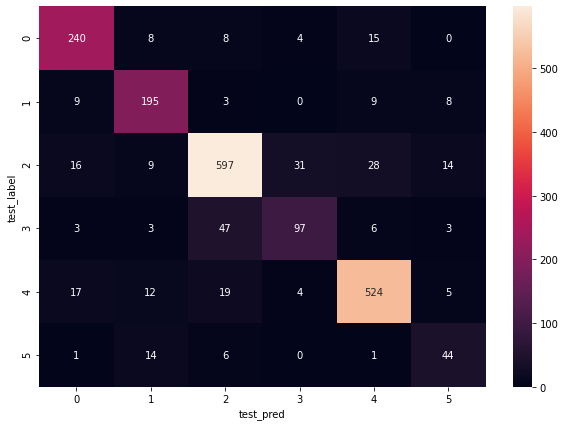

In [360]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('test_pred')
plt.ylabel('test_label')